In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

%matplotlib inline

In [70]:
data_cam_df = pd.read_csv('xcms_pigs_camera.csv', sep = ',', index_col=0)

In [71]:
service_cols = ["mz", "mzmin", "mzmax", "rt", "rtmin", "rtmax", ".", "npeaks", "isotopes", "adduct", "pcgroup"]
assert len(set(service_cols) - set(data_cam_df.columns))==0
samples_cols = list(set(data_cam_df.columns) - set(service_cols))

In [72]:
data_cam_df[data_cam_df==0]=np.nan
data_cam_df[samples_cols] = np.log(data_cam_df[samples_cols])

## standards

#### TAG

In [73]:
new_mz_palm = np.abs((data_cam_df['mz'] - 811.765)) / 811.765 
new_mz_palm = new_mz_palm * 1000000
sunf_ppm_palm = data_cam_df[new_mz_palm<13]

In [74]:
sunf_ppm_palm.head()
sunf_ppm_palm.index

Int64Index([2011], dtype='int64')

In [75]:
RO=pd.Series([i.split('_')[3][1:] if 'S' in i else i for i in data_cam_df.columns],index=data_cam_df.columns)

In [76]:
for i in RO.index:
    try:
        RO[i]=int(RO[i])
    except:
        RO[i]=np.nan

In [77]:
RO=RO.dropna()


#### LPS

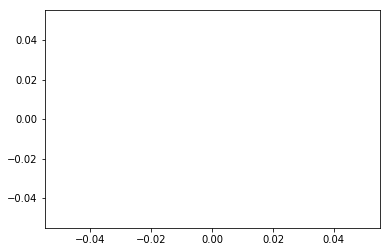

In [78]:
plt.scatter(RO,data_cam_df.loc[1,RO.index], color = 'rebeccapurple')

#### filtration by rt
rt(sec) -> rt(min)

In [79]:
rt_in_min = data_cam_df['rt']/60
data_cam_df['rt'] = rt_in_min
data_cam_filt_rt_df = data_cam_df[(data_cam_df['rt'] > 0.6) & (data_cam_df['rt'] < 19)]
data_cam_filt_rt_df.head(4)

mz       mzmin       mzmax        rt    rtmin    rtmax  npeaks   .  \
1  130.158684  130.158150  130.159207  0.660983   38.049  127.265      79  75   
2  133.100423  133.099922  133.101013  3.391133  202.231  204.805      69  69   
3  147.064214  147.063614  147.064651  0.970192   56.181   61.209      74  73   
4  149.022196  149.021515  149.022699  4.672275  268.144  286.492     140  75   

   X171206_pigs_scat1_3_15_pos_1.100  X171207_pigs_BF1_10_1.50_pos   ...     \
1                          11.640429                     12.005639   ...      
2                          10.248525                     11.050215   ...      
3                          11.269131                      8.689696   ...      
4                          14.002570                     13.957953   ...      

   X171208_pigs_scat2_15_1.100_pos  X171208_pigs_scat2_18_1.100_pos  \
1                        11.927535                        11.867717   
2                        10.273095                         9.808182   
3                         9.952731                         9.736448   
4                        14.030105                        14.237696   

   X171208_pigs_scat2_2_1.100_pos  X171208_pigs_scat2_3_1.100_pos  \
1                       12.015332                       12.048855   
2                       10.138165                        9.222282   
3                       10.247801                        9.891781   
4                       14.040697                       14.005739   

   X171208_pigs_scat2_6_1.100_pos  X171208_pigs_scat2_8_1.100_pos  \
1                       11.646204                       12.103320   
2                       10.018860                       10.075920   
3                       10.268355                        9.772705   
4                       14.212340                       14.243009   

   X171208_pigs_scat2_9_1.100_pos  isotopes  \
1                       11.972464       NaN   
2                        9.181783       NaN   
3                        9.975347       NaN   
4                       14.031754       NaN   

                                         adduct  pcgroup  
1                                           NaN      105  
2                      [M+3H-C6H10O4]3+ 542.333       37  
3  [M+3H-CH2]3+ 452.189 [M+2H-C6H8O6]2+ 468.159       17  
4                                           NaN       61  

[4 rows x 88 columns]

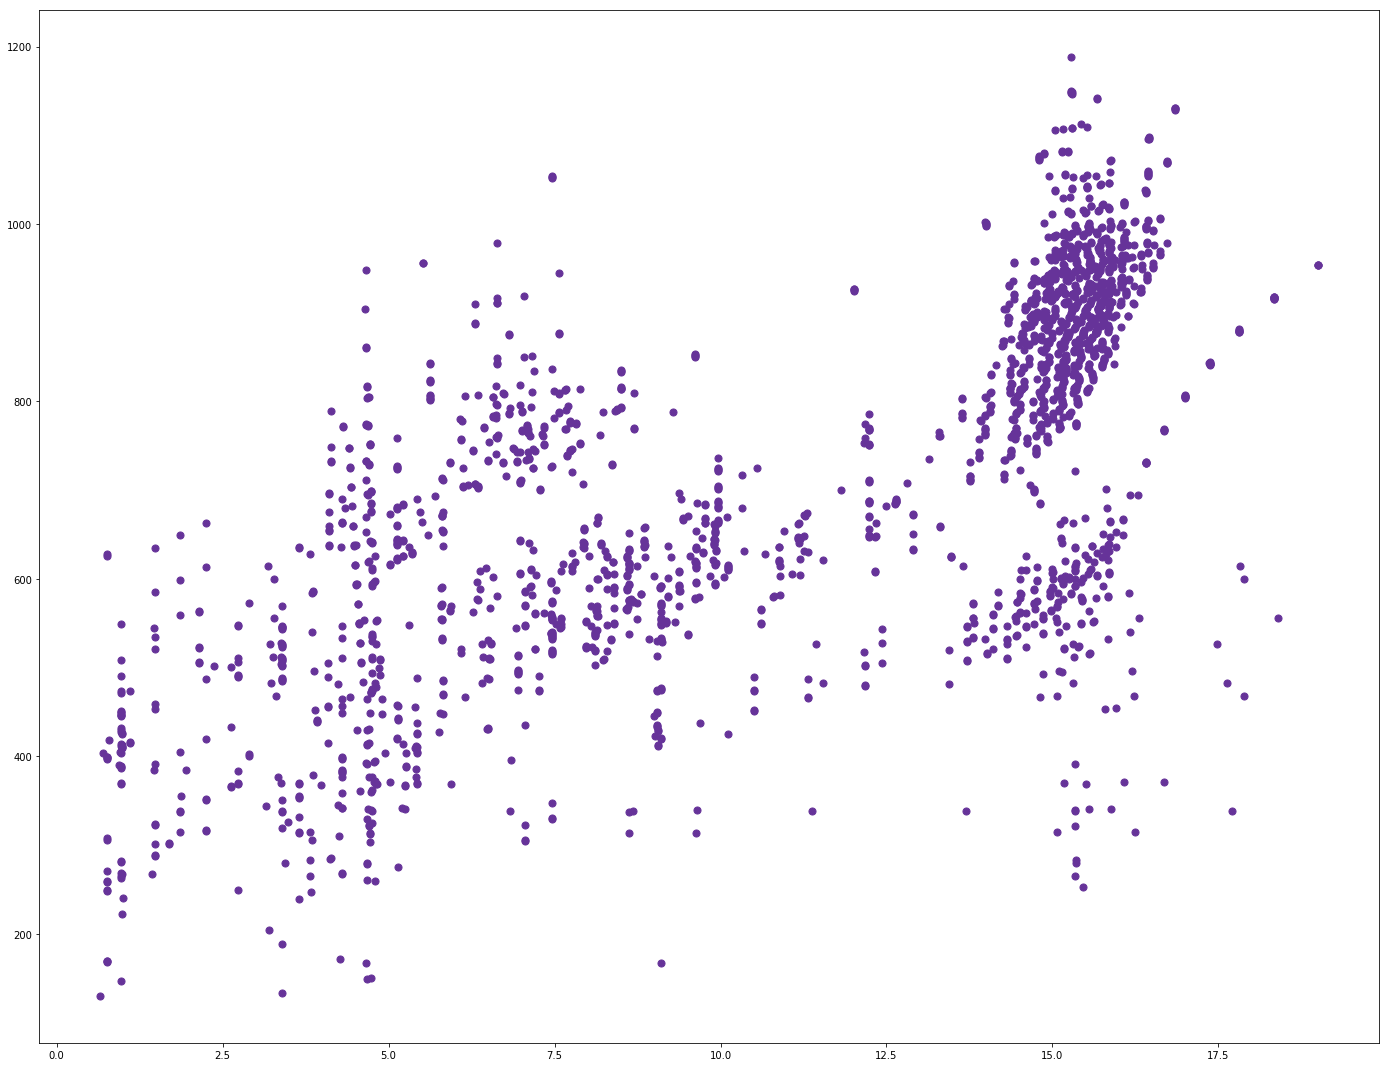

In [80]:
plt.gcf().set_size_inches(24,19)
plt.scatter(data_cam_filt_rt_df['rt'], data_cam_filt_rt_df['mz'], color = 'rebeccapurple', s = 50)

In [81]:
del_isotopes = data_cam_filt_rt_df['isotopes'].str.match(r'\[\d+\]\[M\+\d+\]\+').fillna(False)
#[m][M+n]+ где n от 1, m from 1
data_cam_filt_rt_iso_df = data_cam_filt_rt_df[~del_isotopes]

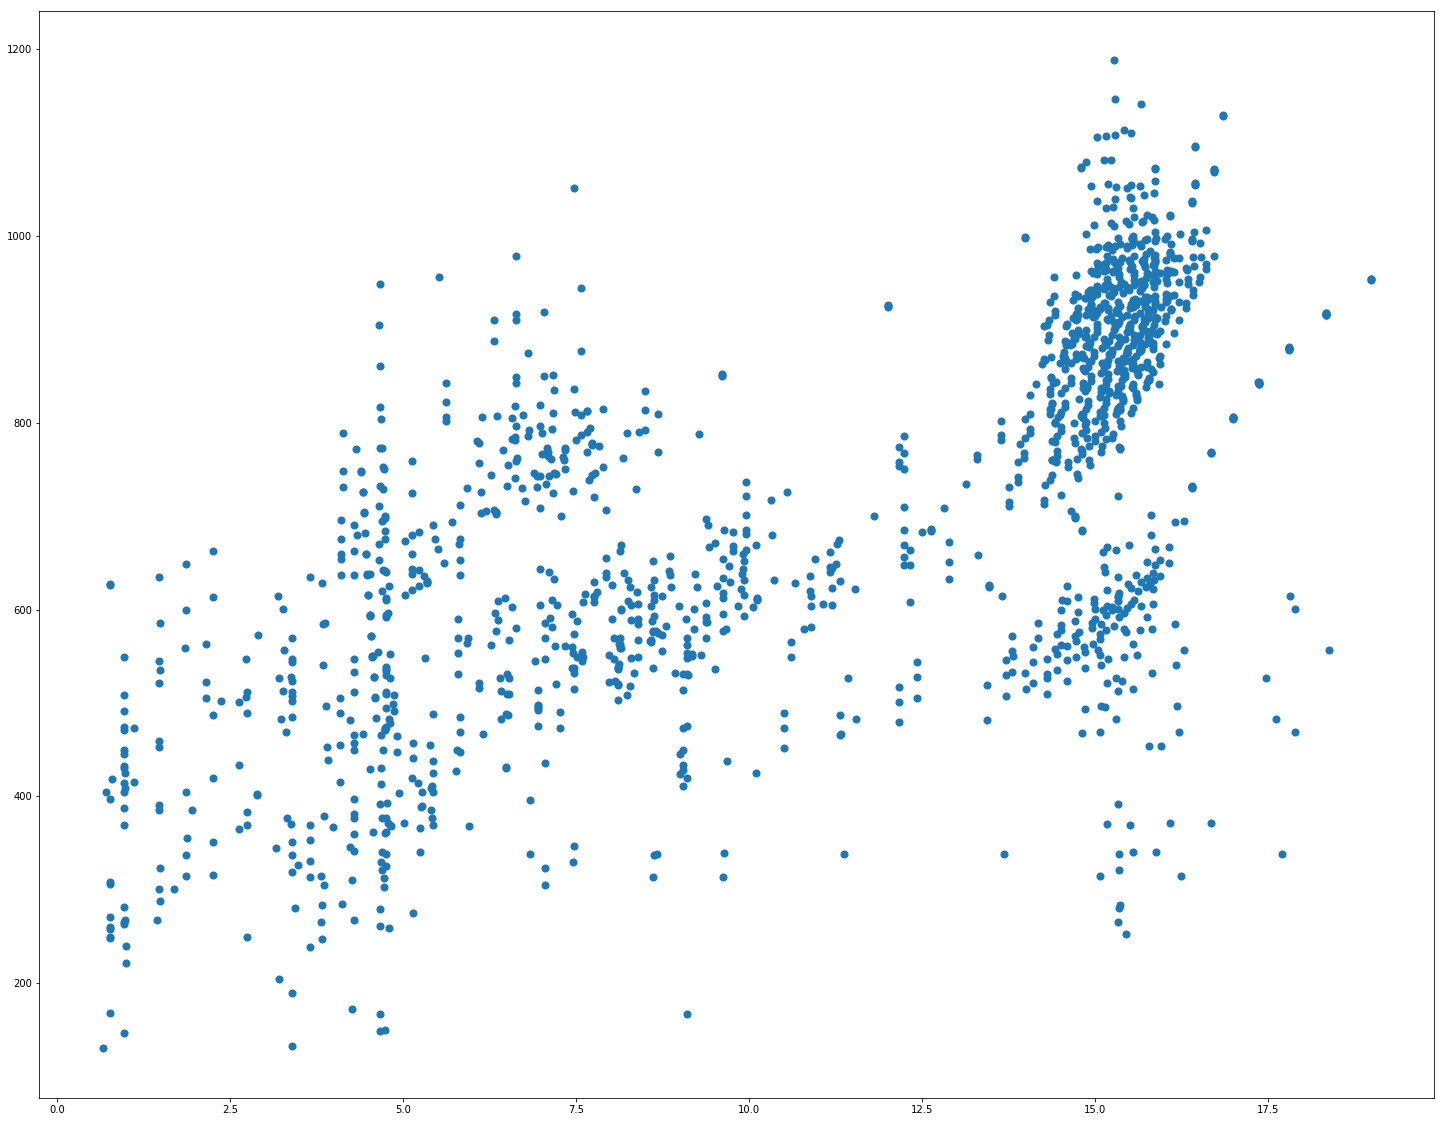

In [82]:
plt.gcf().set_size_inches(25,20)
plt.scatter(data_cam_filt_rt_iso_df['rt'], data_cam_filt_rt_iso_df['mz'], s = 50)



### PCA

In [83]:
lm1_samples = data_cam_filt_rt_iso_df[[col for col in samples_cols if 'LM1' in col]]
lm2_samples = data_cam_filt_rt_iso_df[[col for col in samples_cols if 'LM2'  in col]]
lm3_samples = data_cam_filt_rt_iso_df[[col for col in samples_cols if 'LM3' in col]]
bf1_samples = data_cam_filt_rt_iso_df[[col for col in samples_cols if 'BF1' in col]]
bf2_samples = data_cam_filt_rt_iso_df[[col for col in samples_cols if 'BF2' in col]]
bf3_samples = data_cam_filt_rt_iso_df[[col for col in samples_cols if 'BF3' in col]]
scat1_samples = data_cam_filt_rt_iso_df[[col for col in samples_cols if 'scat1' in col]]
scat2_samples = data_cam_filt_rt_iso_df[[col for col in samples_cols if 'scat2' in col]]

In [84]:
samples_filled_nan = data_cam_filt_rt_iso_df[samples_cols].fillna(0).transpose().as_matrix()

In [85]:
pca = PCA(2)

transformed_samples = pca.fit_transform(samples_filled_nan)

In [86]:
transformed_samples_df = pd.DataFrame(transformed_samples.T, columns = samples_cols)

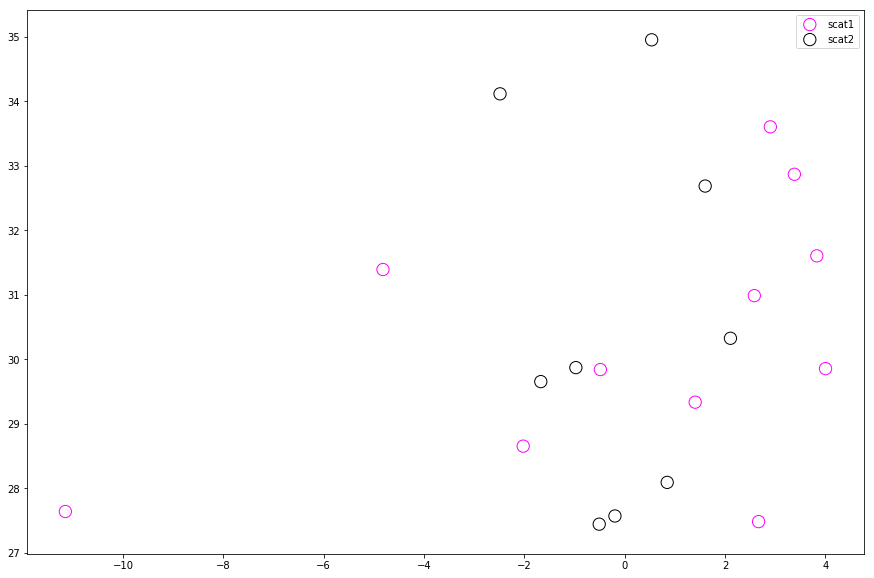

In [87]:
plt.gcf().set_size_inches(15,10)
#plt.scatter(transformed_samples[:,0], transformed_samples[:,1], s = 200)
plt.scatter(transformed_samples_df[scat1_samples.columns].loc[0], transformed_samples_df[scat1_samples.columns].loc[1],
             s = 150, facecolors='none', edgecolors='#FF00FF',  label="scat1")
plt.scatter(transformed_samples_df[scat2_samples.columns].loc[0], transformed_samples_df[scat2_samples.columns].loc[1],
             s = 150, facecolors='none', edgecolors='black',  label="scat2")
plt.legend() 

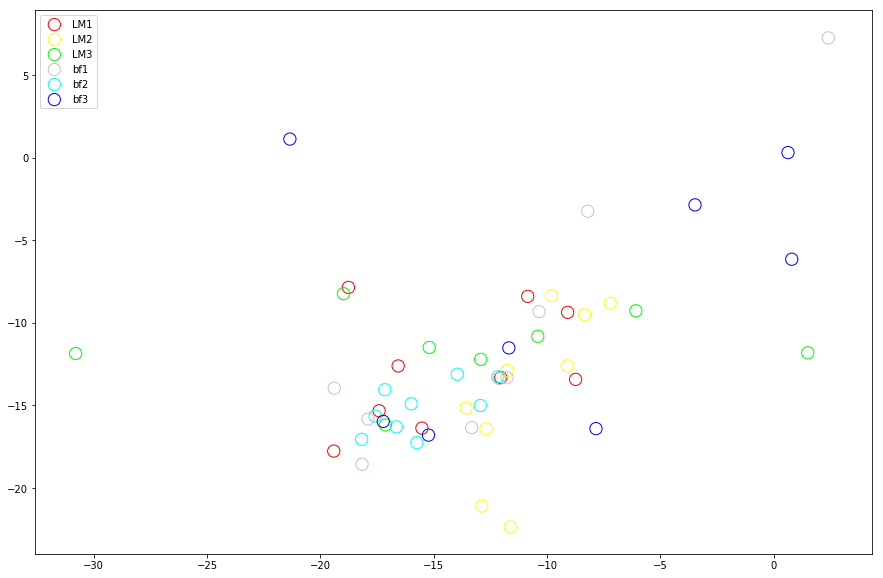

In [88]:
plt.gcf().set_size_inches(15,10)
#plt.scatter(transformed_samples[:,0], transformed_samples[:,1], s = 200)
plt.scatter(transformed_samples_df[lm1_samples.columns].loc[0], transformed_samples_df[lm1_samples.columns].loc[1],
             s = 150, facecolors='none', edgecolors='#FF0000',  label="LM1")
plt.scatter(transformed_samples_df[lm2_samples.columns].loc[0], transformed_samples_df[lm2_samples.columns].loc[1],
             s = 150, facecolors='none', edgecolors='#FFFF00',  label="LM2")
plt.scatter(transformed_samples_df[lm3_samples.columns].loc[0], transformed_samples_df[lm3_samples.columns].loc[1],
             s = 150, facecolors='none', edgecolors='#00FF00',  label="LM3")
plt.scatter(transformed_samples_df[bf1_samples.columns].loc[0], transformed_samples_df[bf1_samples.columns].loc[1],
             s = 150, facecolors='none', edgecolors='#D6BCC0',  label="bf1")
plt.scatter(transformed_samples_df[bf2_samples.columns].loc[0], transformed_samples_df[bf2_samples.columns].loc[1],
             s = 150, facecolors='none', edgecolors='#00FFFF',  label="bf2")
plt.scatter(transformed_samples_df[bf3_samples.columns].loc[0], transformed_samples_df[bf3_samples.columns].loc[1],
             s = 150, facecolors='none', edgecolors='#0000FF',  label="bf3")
plt.legend() 

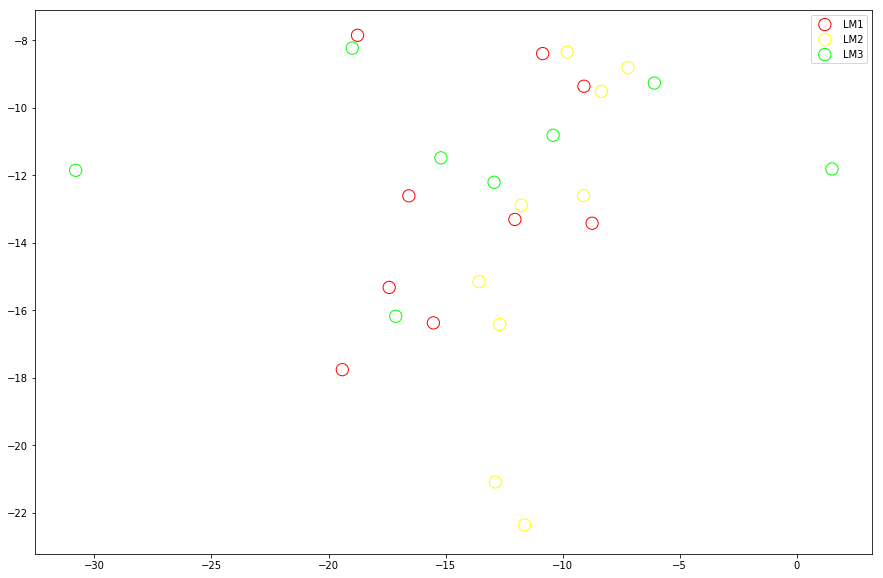

In [89]:
plt.gcf().set_size_inches(15,10)
#plt.scatter(transformed_samples[:,0], transformed_samples[:,1], s = 200)
plt.scatter(transformed_samples_df[lm1_samples.columns].loc[0], transformed_samples_df[lm1_samples.columns].loc[1],
             s = 150, facecolors='none', edgecolors='#FF0000',  label="LM1")
plt.scatter(transformed_samples_df[lm2_samples.columns].loc[0], transformed_samples_df[lm2_samples.columns].loc[1],
             s = 150, facecolors='none', edgecolors='#FFFF00',  label="LM2")
plt.scatter(transformed_samples_df[lm3_samples.columns].loc[0], transformed_samples_df[lm3_samples.columns].loc[1],
             s = 150, facecolors='none', edgecolors='#00FF00',  label="LM3")
plt.legend() 

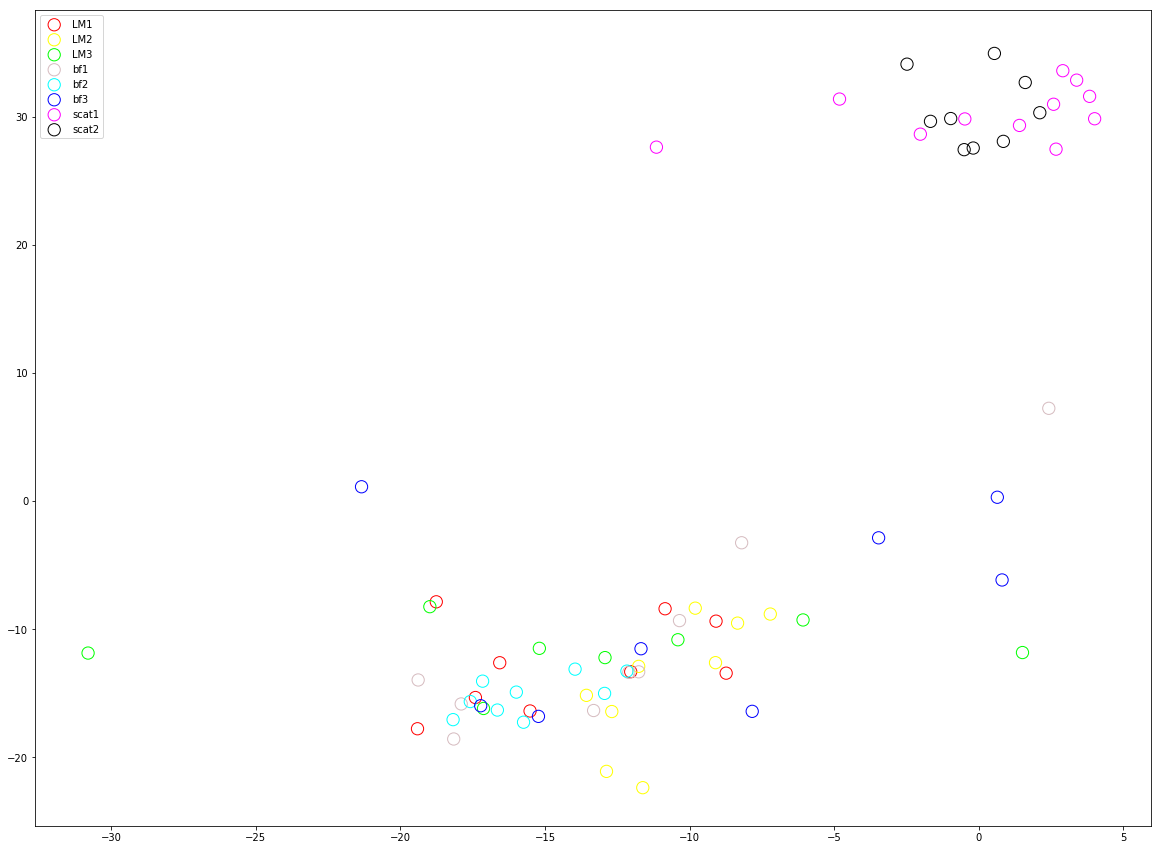

In [90]:
plt.gcf().set_size_inches(20,15)
#plt.scatter(transformed_samples[:,0], transformed_samples[:,1], s = 200)
plt.scatter(transformed_samples_df[lm1_samples.columns].loc[0], transformed_samples_df[lm1_samples.columns].loc[1],
             s = 150, facecolors='none', edgecolors='#FF0000',  label="LM1")
plt.scatter(transformed_samples_df[lm2_samples.columns].loc[0], transformed_samples_df[lm2_samples.columns].loc[1],
             s = 150, facecolors='none', edgecolors='#FFFF00',  label="LM2")
plt.scatter(transformed_samples_df[lm3_samples.columns].loc[0], transformed_samples_df[lm3_samples.columns].loc[1],
             s = 150, facecolors='none', edgecolors='#00FF00',  label="LM3")
plt.scatter(transformed_samples_df[bf1_samples.columns].loc[0], transformed_samples_df[bf1_samples.columns].loc[1],
             s = 150, facecolors='none', edgecolors='#D6BCC0',  label="bf1")
plt.scatter(transformed_samples_df[bf2_samples.columns].loc[0], transformed_samples_df[bf2_samples.columns].loc[1],
             s = 150, facecolors='none', edgecolors='#00FFFF',  label="bf2")
plt.scatter(transformed_samples_df[bf3_samples.columns].loc[0], transformed_samples_df[bf3_samples.columns].loc[1],
             s = 150, facecolors='none', edgecolors='#0000FF',  label="bf3")
plt.scatter(transformed_samples_df[scat1_samples.columns].loc[0], transformed_samples_df[scat1_samples.columns].loc[1],
             s = 150, facecolors='none', edgecolors='#FF00FF',  label="scat1")
plt.scatter(transformed_samples_df[scat2_samples.columns].loc[0], transformed_samples_df[scat2_samples.columns].loc[1],
             s = 150, facecolors='none', edgecolors='black',  label="scat2")
plt.legend() 

In [91]:
def add_mz_rt_cols(df):
    return data_cam_filt_rt_iso_df[df.columns.tolist() + ['mz', 'rt']]

lm1_samples_with_mz_rt = add_mz_rt_cols(lm1_samples)

### after Anya filtering

In [92]:
filtering_res = np.load('cleanedpeaks.npy')

In [93]:
filtering_res_indices = sorted(set(data_cam_filt_rt_iso_df.index) & set(filtering_res))

In [94]:
data_filtering = data_cam_filt_rt_iso_df.loc[filtering_res_indices]

In [95]:
type(data_filtering)

pandas.core.frame.DataFrame

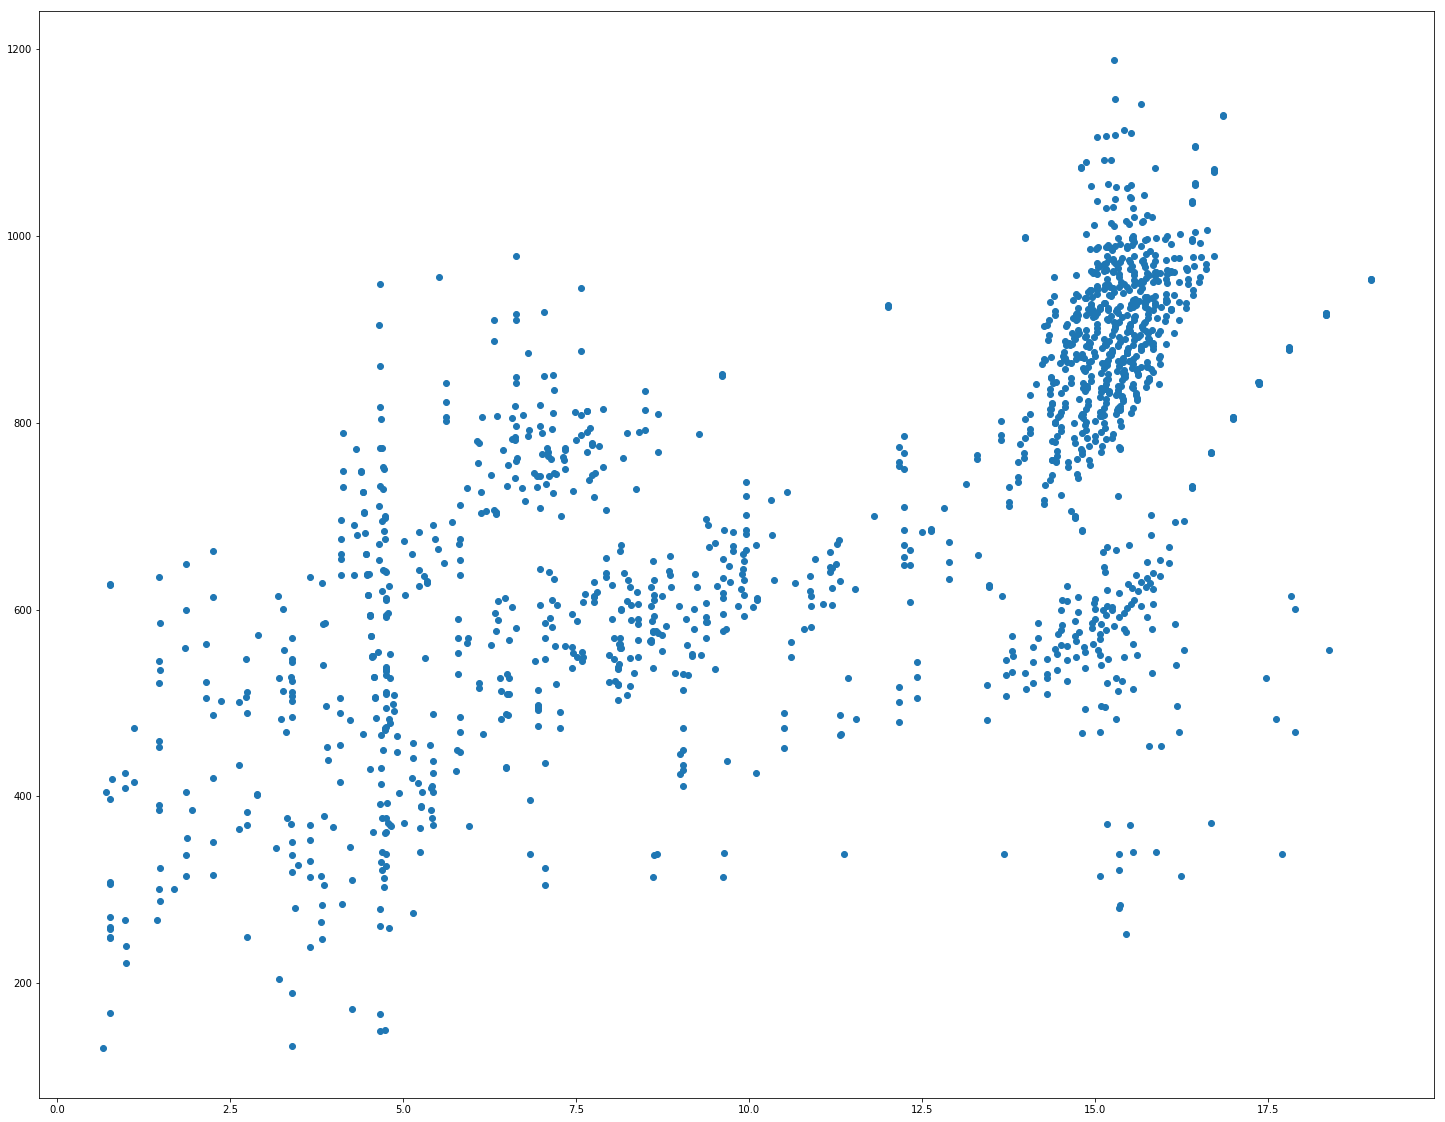

In [96]:
plt.gcf().set_size_inches(25,20)
plt.scatter(data_filtering['rt'], data_filtering['mz'])

## annotation


In [97]:
annot_data = pd.read_csv('xcms_pigs_camera.csv.ann.txt', sep = ',', index_col=0)
#loading data

In [98]:
lmfa_index = annot_data['lm_id'].str.contains('LMFA0103').fillna(False)
#строки в annot_data которые содержать LMFA0101 + что-то
lmfa_annot_data = annot_data[lmfa_index]
lmfa_annot_data = annot_data[lmfa_index]
#беру из annot_data строки которые соответствуют строкам в которых есть LMFA0101 + что-то

In [99]:
annot_data_no_null = annot_data[~annot_data['lm_id'].isnull()]


In [100]:
annot_groups = []

for index, data in annot_data_no_null.groupby(annot_data_no_null.index):
    annot_groups.append({
        "index": index,
        "lm_id": ";".join(data.lm_id),
        "adduct_annot": ";".join(data.adduct)
    })
    
annot_groups = pd.DataFrame(annot_groups)
annot_groups.set_index('index', inplace=True)

In [101]:
data_cam_filt_rt_iso_df_annot = pd.merge(data_cam_filt_rt_iso_df, annot_groups, left_index=True, right_index=True)


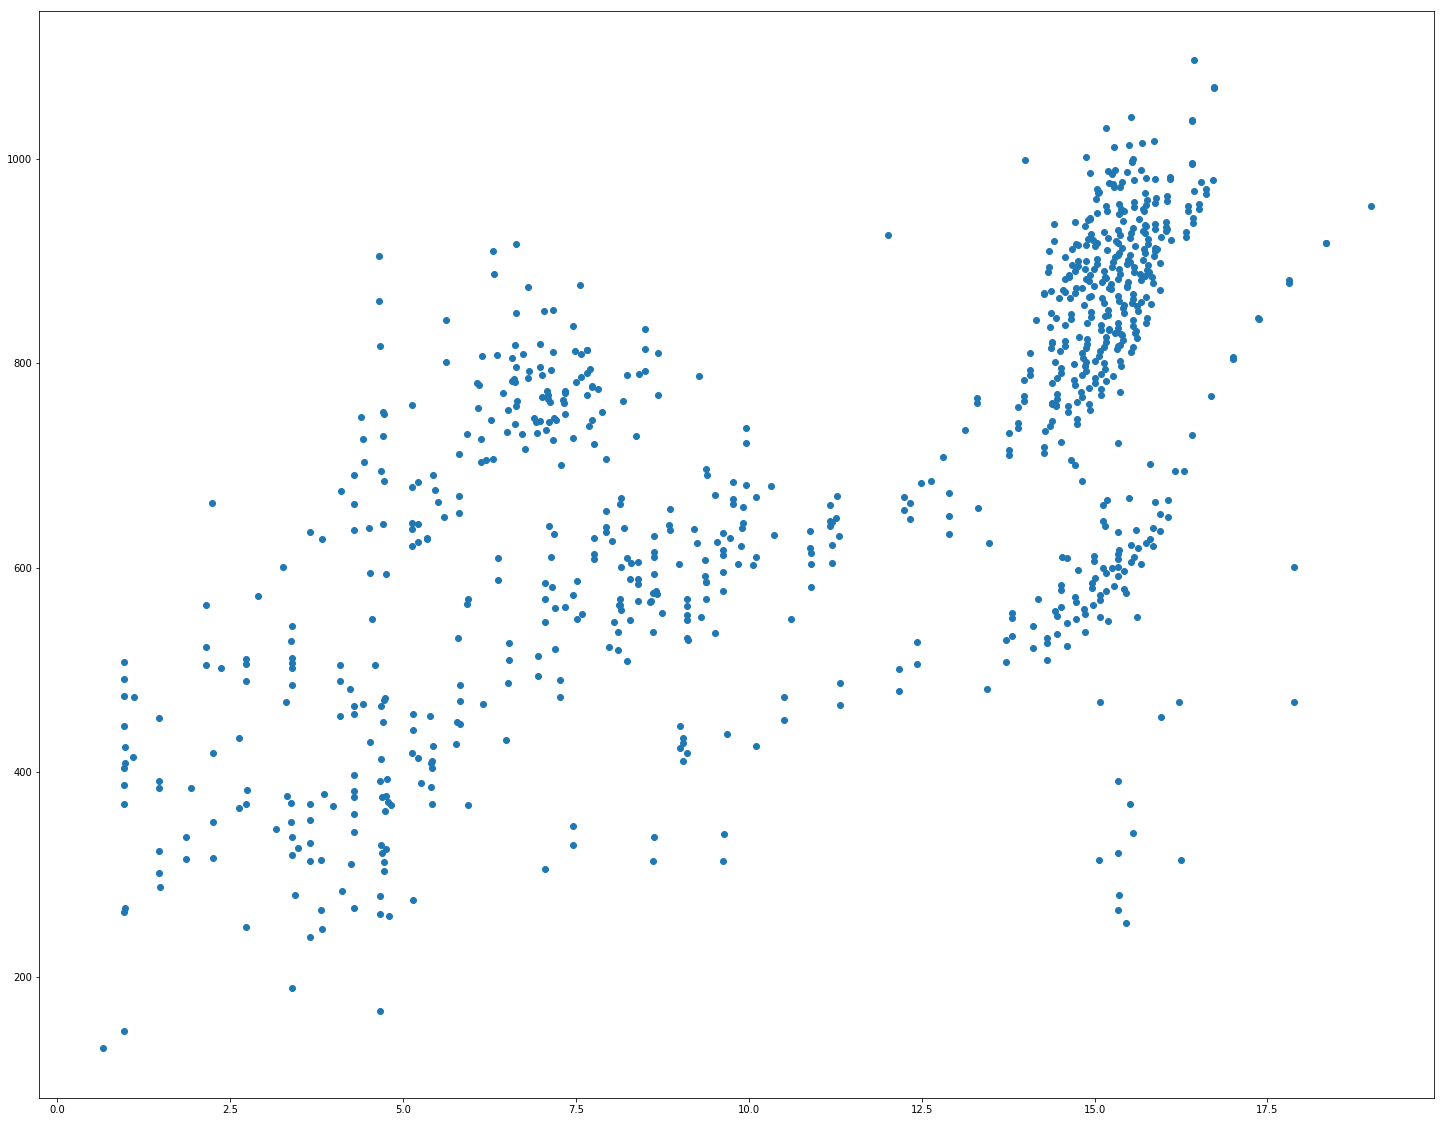

In [102]:
plt.gcf().set_size_inches(25,20)
plt.scatter(data_cam_filt_rt_iso_df_annot['rt'], data_cam_filt_rt_iso_df_annot['mz'])

In [103]:
lmfa_index3 = annot_data['lm_id'].str.contains('LMFA0103').fillna(False)
#строки в annot_data которые содержать LMFA0101 + что-то
lmfa_annot_data3 = annot_data[lmfa_index3]
lmfa_annot_data3 = annot_data[lmfa_index3]
#беру из annot_data строки которые соответствуют строкам в которых есть LMFA0101 + что-то

In [104]:
lmfa_annot_data3

lm_id adduct       ppm
8    LMFA01030783    M+H -3.781975
23   LMFA01030981    M+H -5.919063
37   LMFA01030240   M+Na  8.363737
37   LMFA01030241   M+Na  8.363737
37   LMFA01030242   M+Na  8.363737
37   LMFA01030464   M+Na  8.363737
118  LMFA01030109   M+Na -3.746604
118  LMFA01030268   M+Na -3.746604
118  LMFA01030269   M+Na -3.746604
118  LMFA01030270   M+Na -3.746604
118  LMFA01030271   M+Na -3.746604
118  LMFA01030272   M+Na -3.746604
118  LMFA01030273   M+Na -3.746604
118  LMFA01030274   M+Na -3.746604
118  LMFA01030275   M+Na -3.746604
118  LMFA01030494   M+Na -3.746604
118  LMFA01030495   M+Na -3.746604
118  LMFA01030496   M+Na -3.746604
118  LMFA01030497   M+Na -3.746604
118  LMFA01030806   M+Na -3.746604
118  LMFA01030807   M+Na -3.746604
118  LMFA01030814   M+Na -3.746604
157  LMFA01030140   M+Na -7.663853
157  LMFA01030141   M+Na -7.663853
157  LMFA01030142   M+Na -7.663853
157  LMFA01030143   M+Na -7.663853
157  LMFA01030144   M+Na -7.663853
157  LMFA01030145   M+Na -7.663853
157  LMFA01030146   M+Na -7.663853
157  LMFA01030147   M+Na -7.663853
..            ...    ...       ...
562  LMFA01030827    M+H -8.882272
562  LMFA01030097   M+Na -3.969940
562  LMFA01030875   M+Na -3.969940
562  LMFA01031013   M+Na -3.969940
581  LMFA01030098    M+H -3.526081
598  LMFA01030889    M+H  4.952384
640  LMFA01030828    M+H -8.466893
640  LMFA01030098   M+Na -3.823263
641  LMFA01030828    M+H -8.163154
641  LMFA01030098   M+Na -3.505568
711  LMFA01030842   M+Na -3.624138
750  LMFA01030836    M+H -8.143040
750  LMFA01030850    M+H -8.143040
751  LMFA01030836    M+H -7.860982
751  LMFA01030850    M+H -7.860982
757  LMFA01030829    M+H -7.950802
758  LMFA01030829    M+H -8.246013
826  LMFA01030836  M+NH4  6.209551
826  LMFA01030850  M+NH4  6.209551
834  LMFA01030829  M+NH4  7.563012
853  LMFA01030836   M+Na -3.628547
853  LMFA01030850   M+Na -3.628547
896  LMFA01030837    M+H -7.976583
896  LMFA01030851    M+H -7.976583
897  LMFA01030837    M+H -7.722373
897  LMFA01030851    M+H -7.722373
911  LMFA01030830    M+H -9.504499
971  LMFA01030844  M+NH4  6.230893
986  LMFA01030837  M+NH4  5.213680
986  LMFA01030851  M+NH4  5.213680

[118 rows x 3 columns]

In [105]:
data_cam_filt_rt_iso_df_annot.rename(columns={"X171208_pigs_LM3_1_11_1.50_pos": "X171208_pigs_LM3_11_1.50_pos"}, inplace=True)

In [106]:
import re
part_pattern = re.compile(r"_pigs_(\S+?)_")

def get_pig_part(col_name):
    return part_pattern.search(col_name).group(1)
    
    
parts_mapping = {}
for col in data_cam_filt_rt_iso_df_annot.columns:
    if "QC" in col:
        continue
    
    try:
        parts_mapping.setdefault(get_pig_part(col), []).append(col) 
    except:
        pass

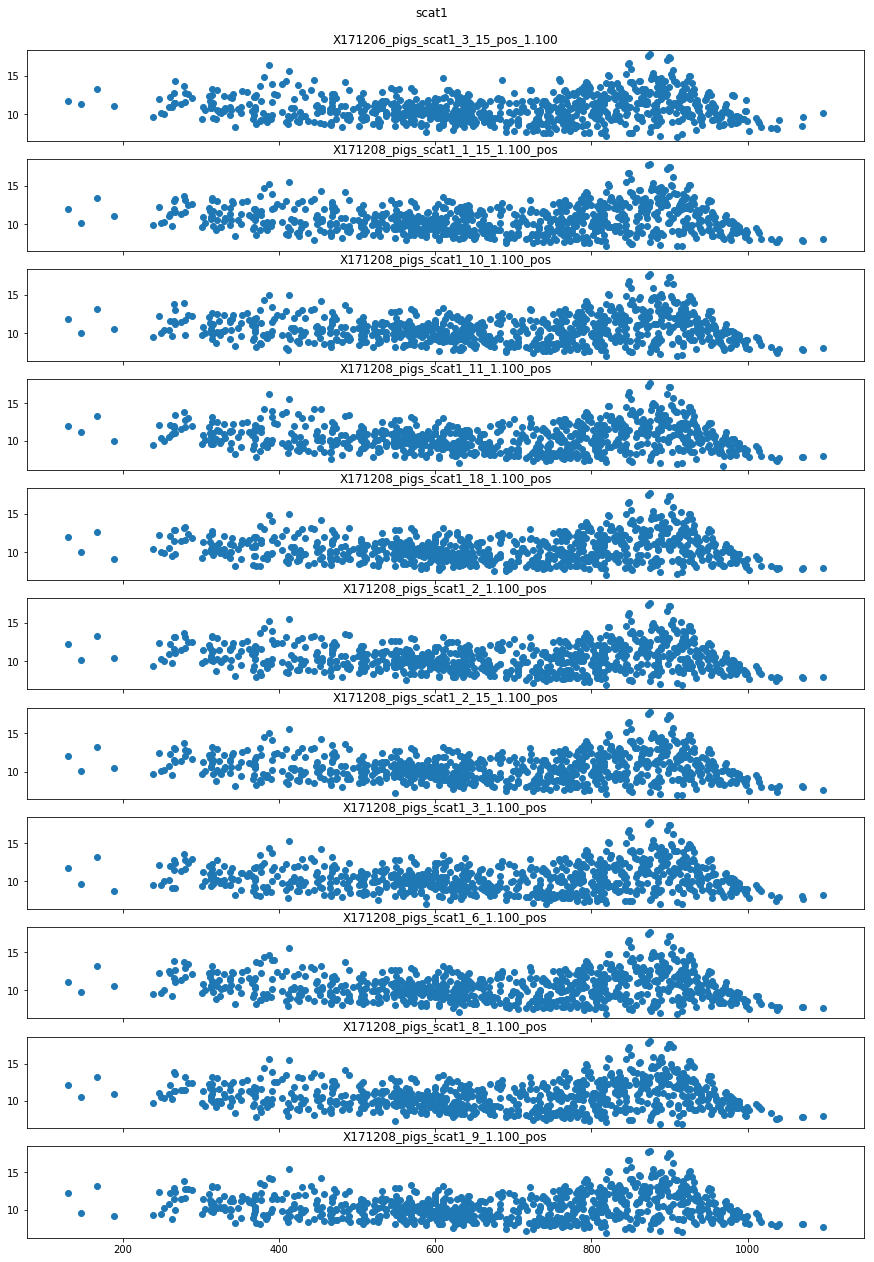

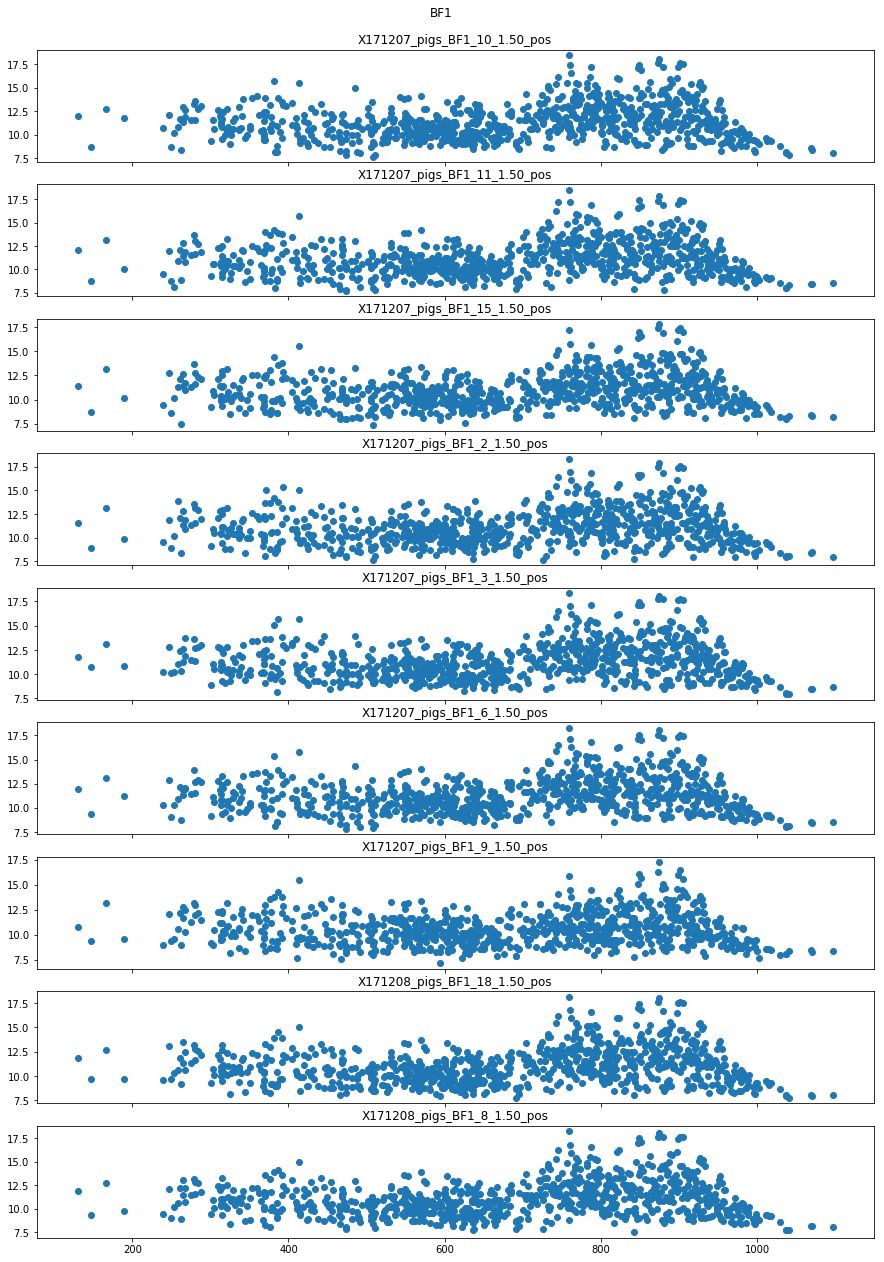

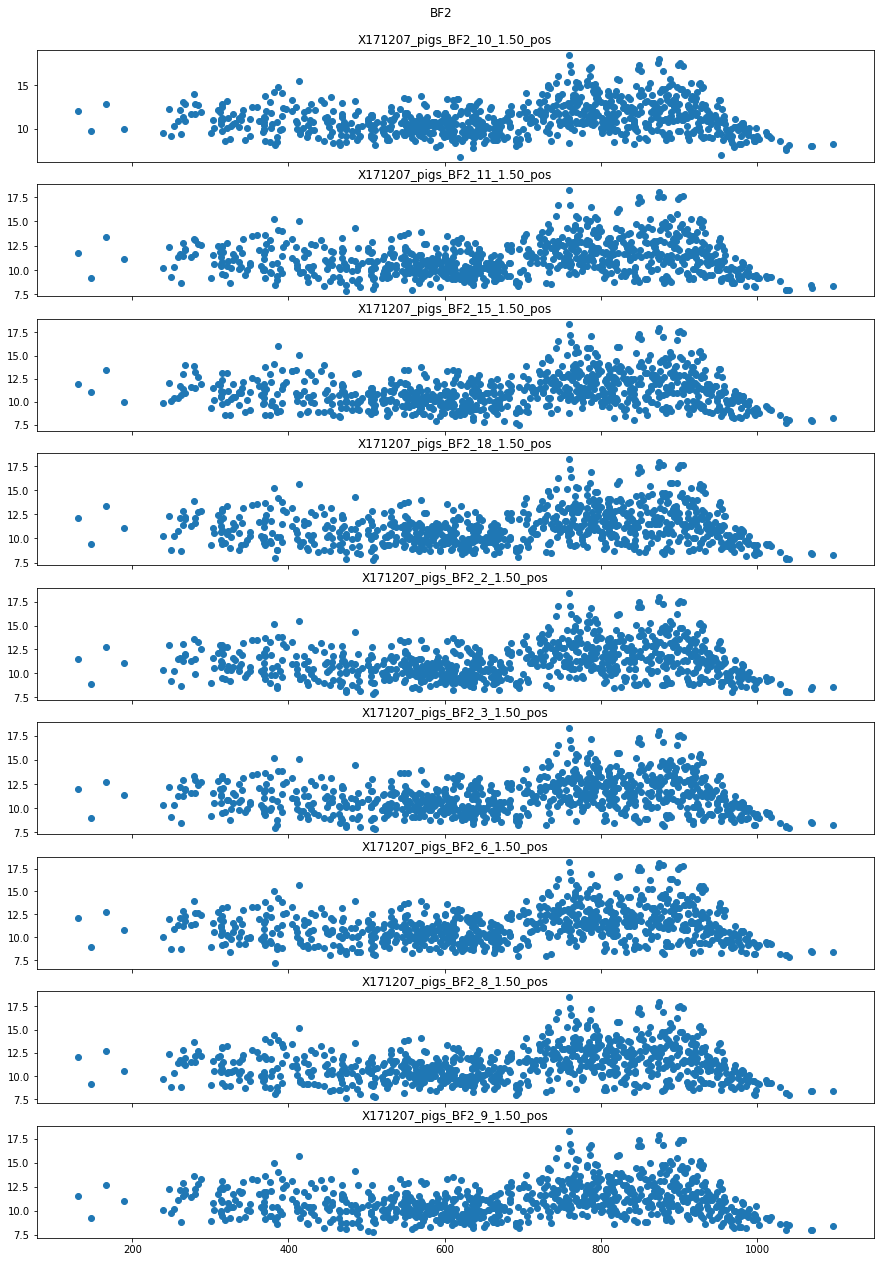

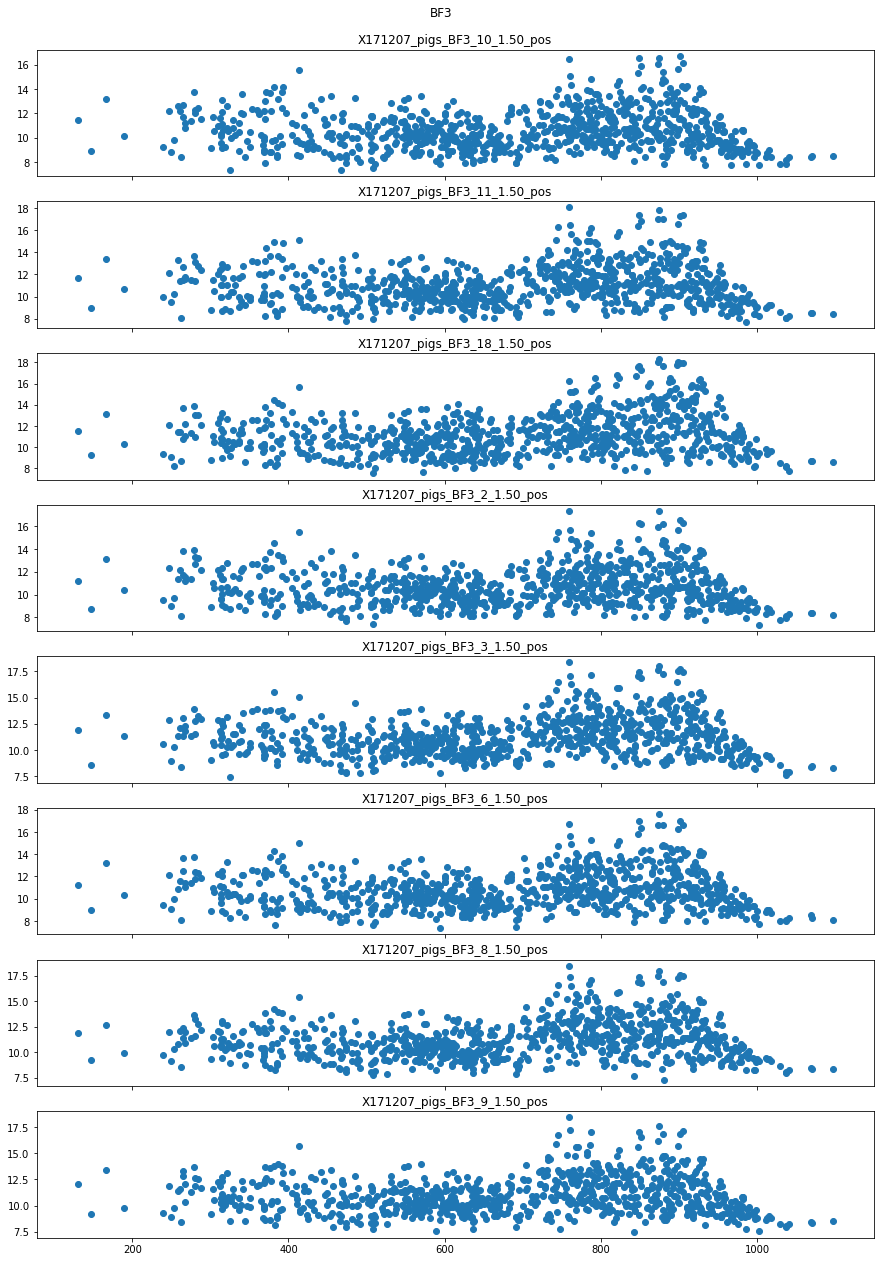

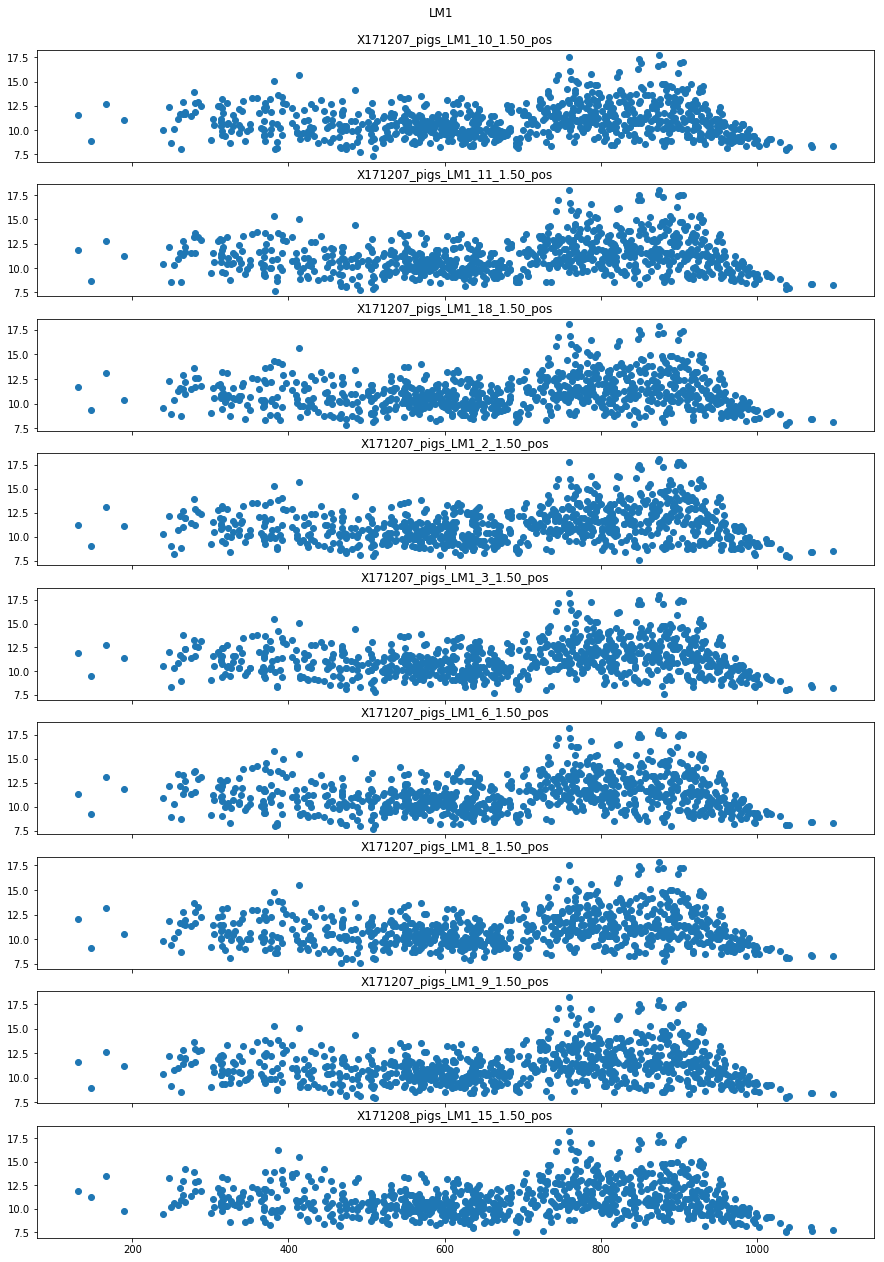

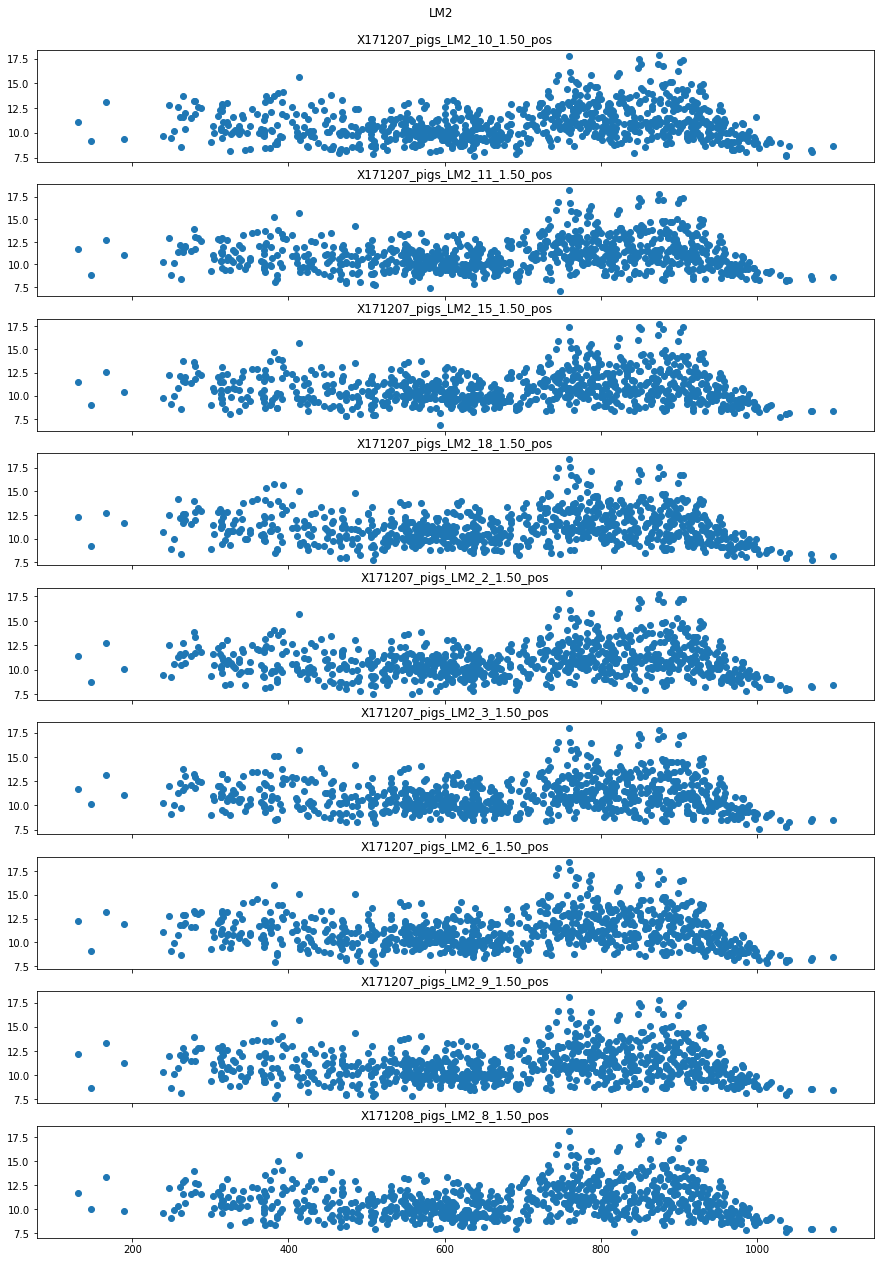

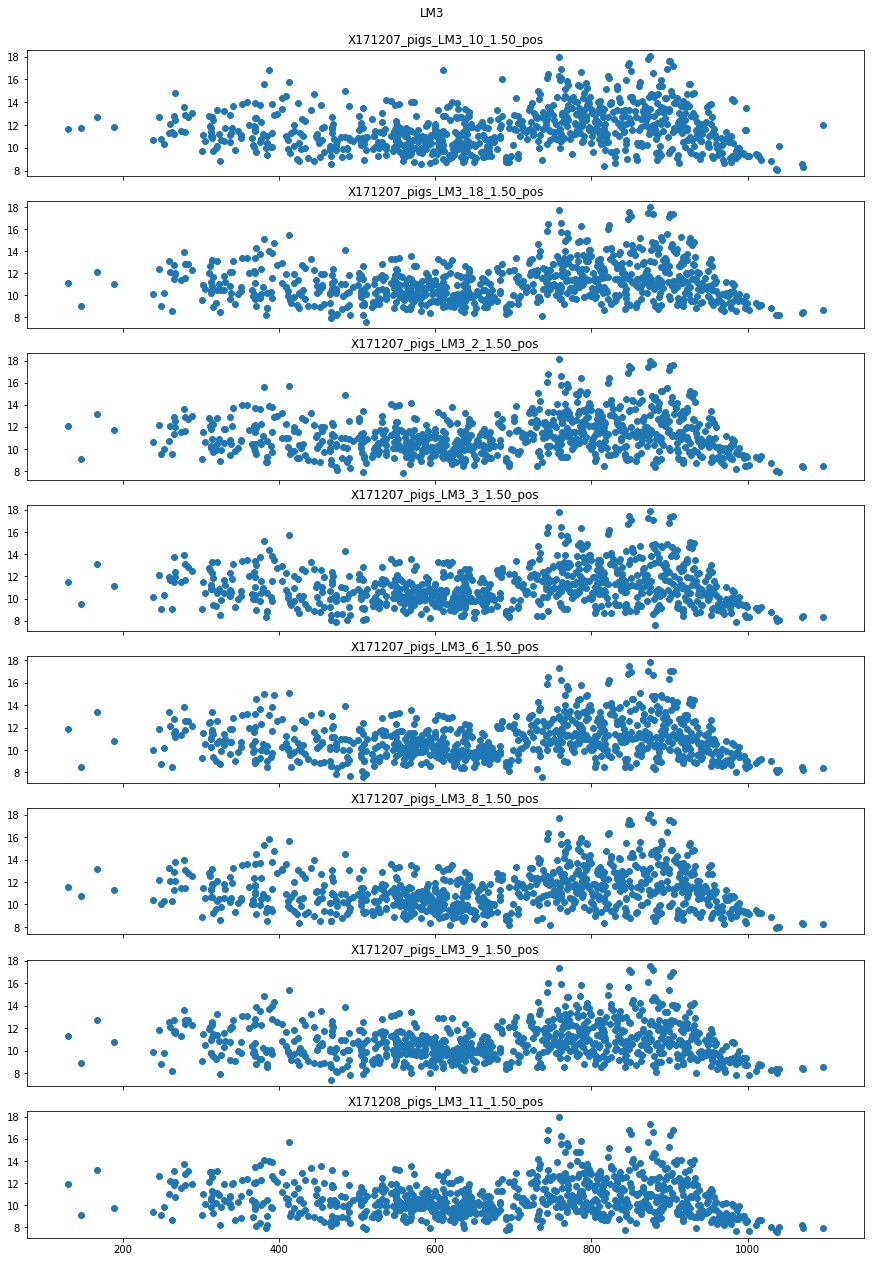

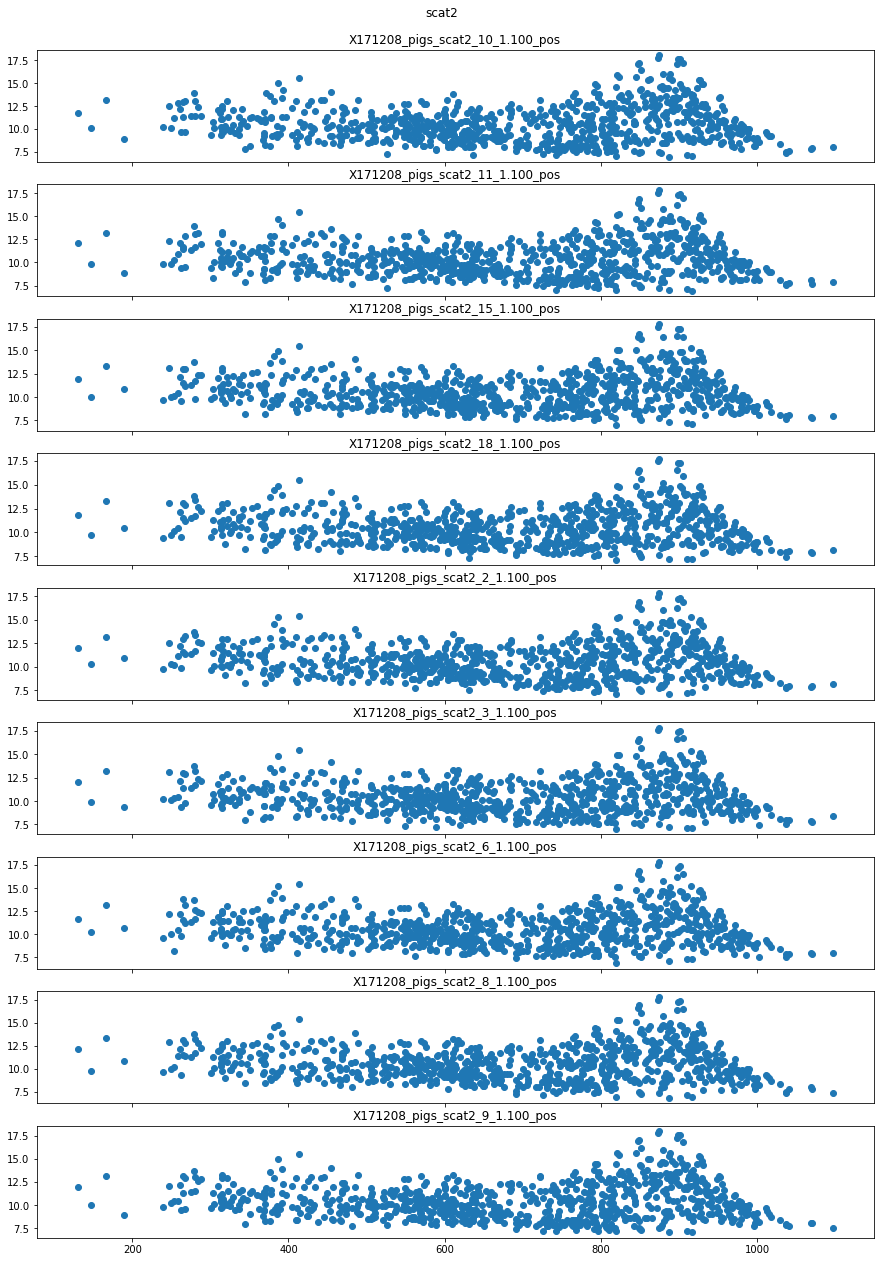

In [107]:
for part, columns in parts_mapping.items():

    f, axarr = plt.subplots(len(columns), sharex=True, figsize=(15,20))
    
    for ax, col in zip(axarr, columns):
        ax.scatter(data_cam_filt_rt_iso_df_annot.mz, data_cam_filt_rt_iso_df_annot[col])
        ax.set_title(col)
    
    f.suptitle(part)
    f.subplots_adjust(top=0.95)
    
    plt.show()

In [108]:
pigs_pattern = re.compile(r"_pigs_\S+?_(\S+?)_")


def get_pig_num(col_name):
    return int(pigs_pattern.search(col_name).group(1))
    
    
pigs_mapping = {}
for col in data_cam_filt_rt_iso_df_annot.columns:
    if "QC" in col or "scat1" in col:
        continue
    
    try:
        pigs_mapping.setdefault(get_pig_num(col), []).append(col) 
    except:
        pass


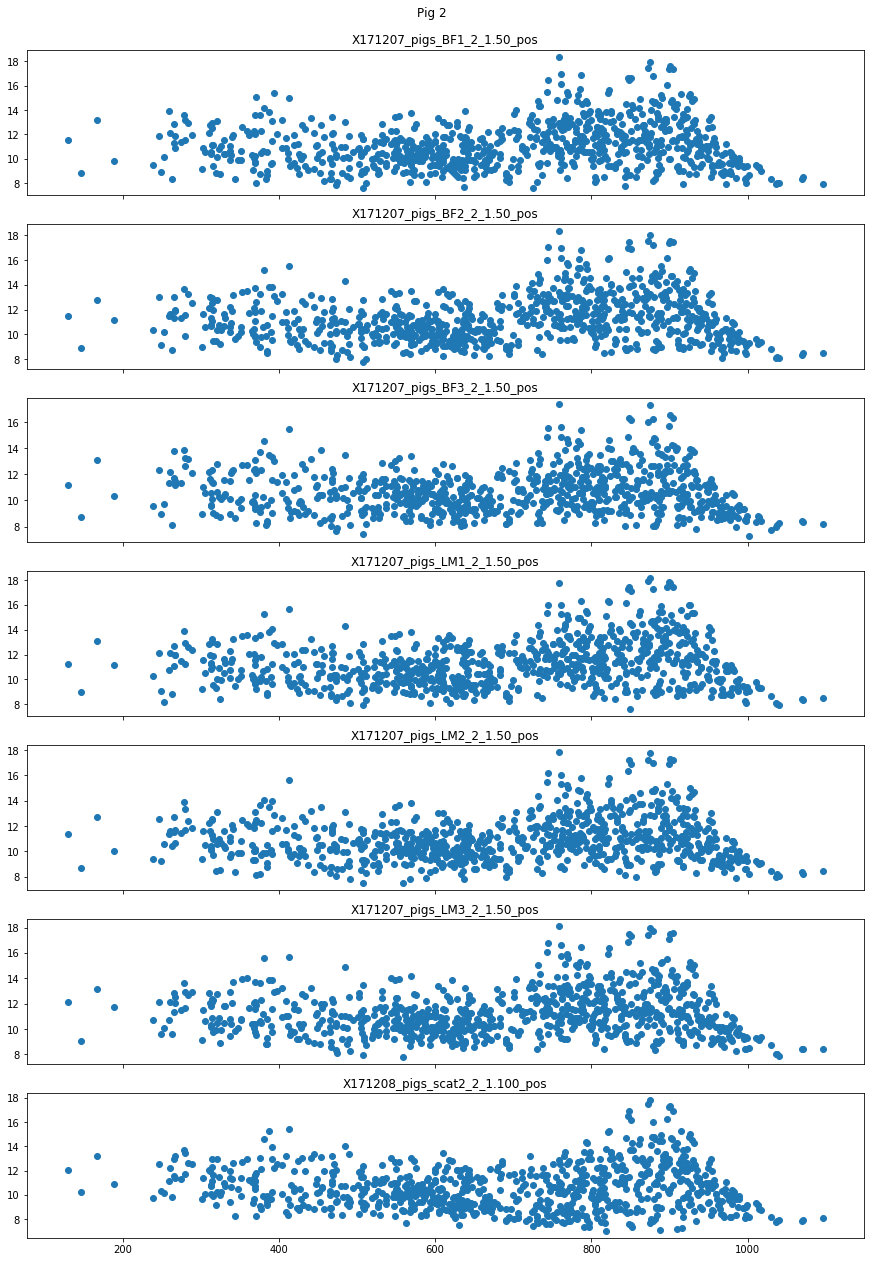

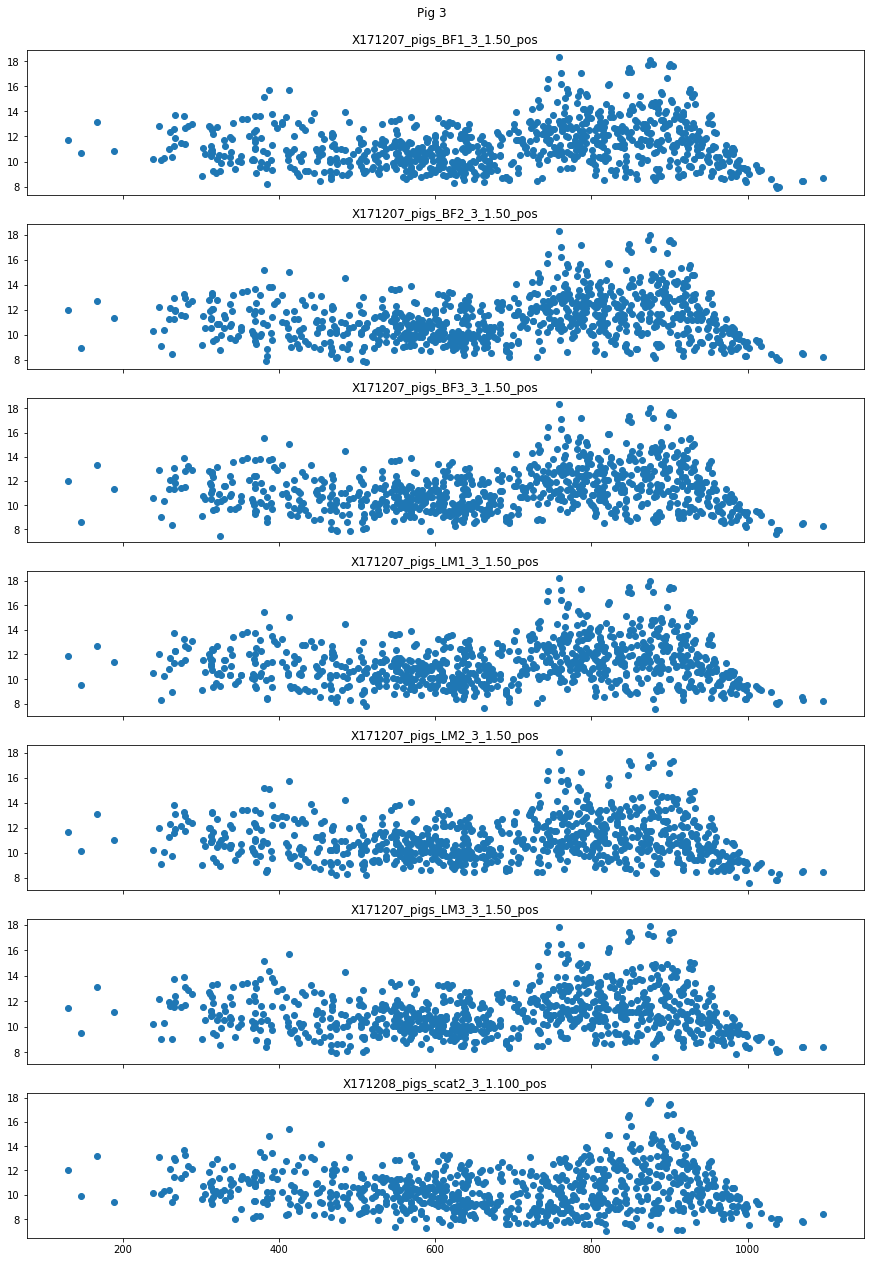

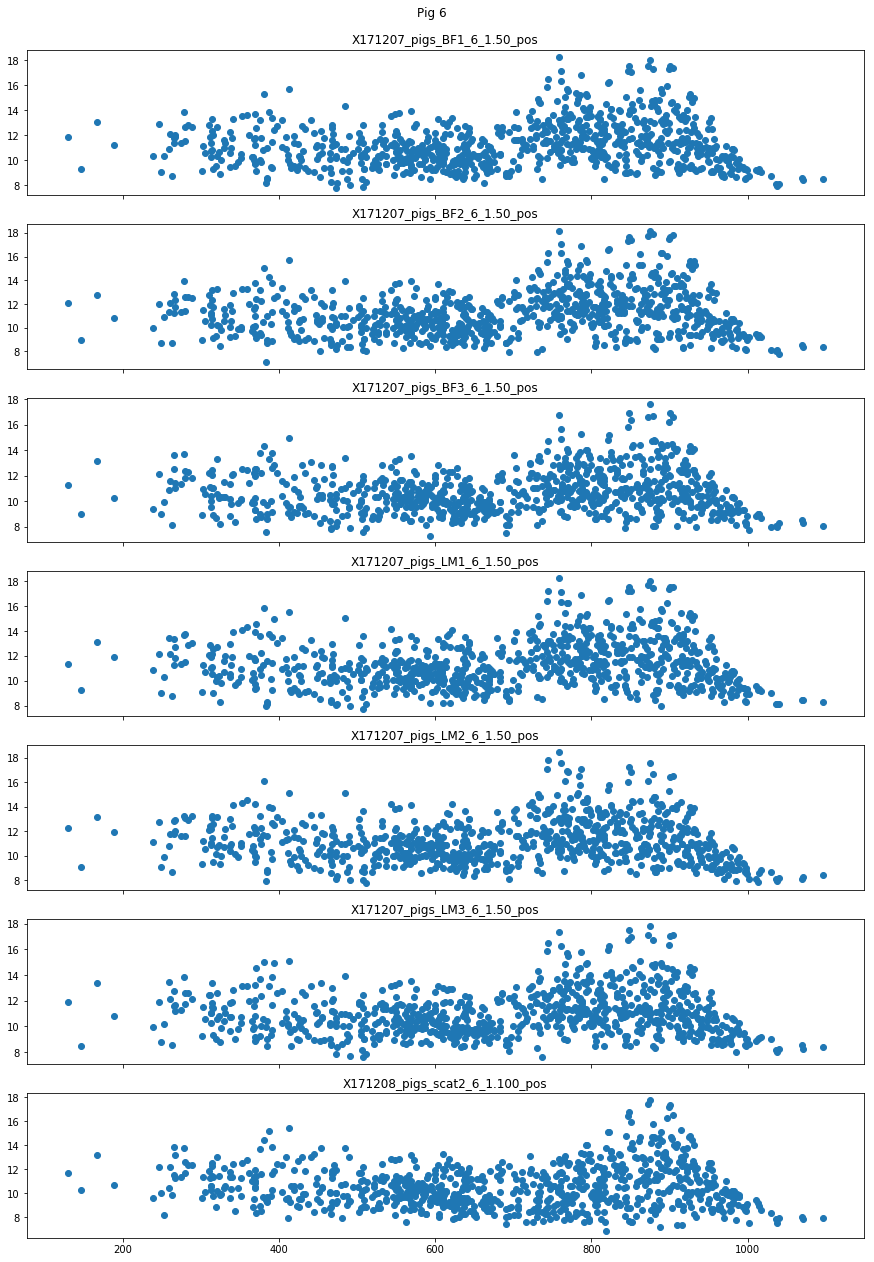

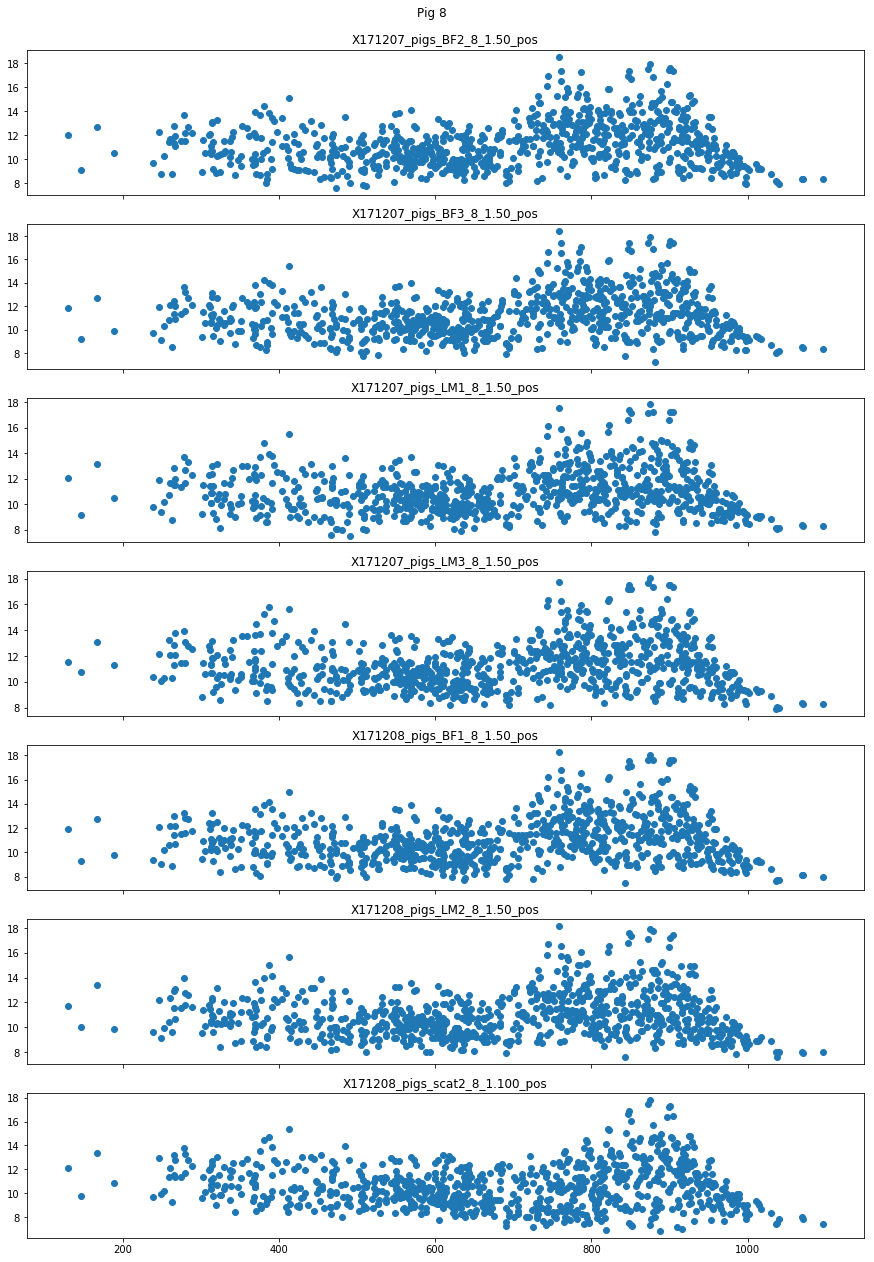

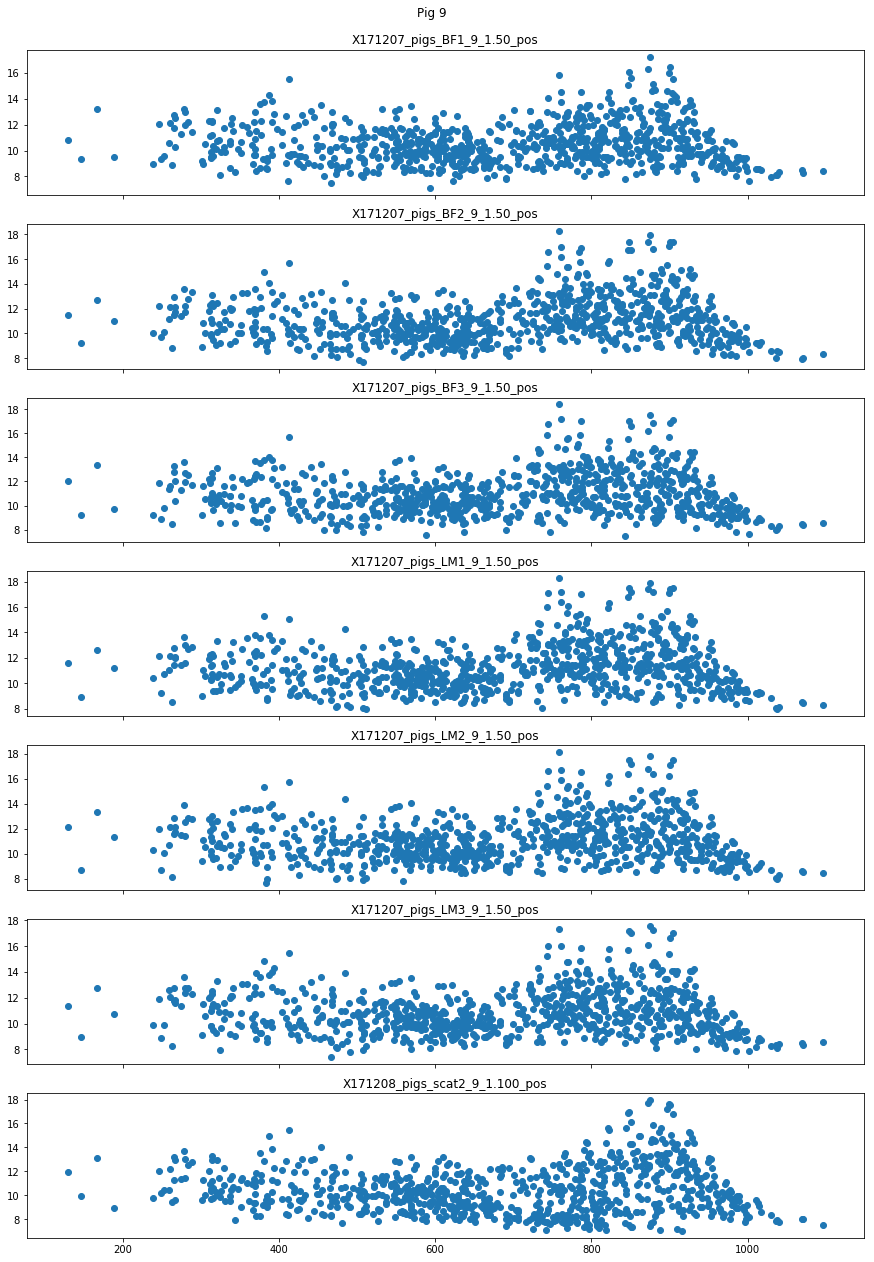

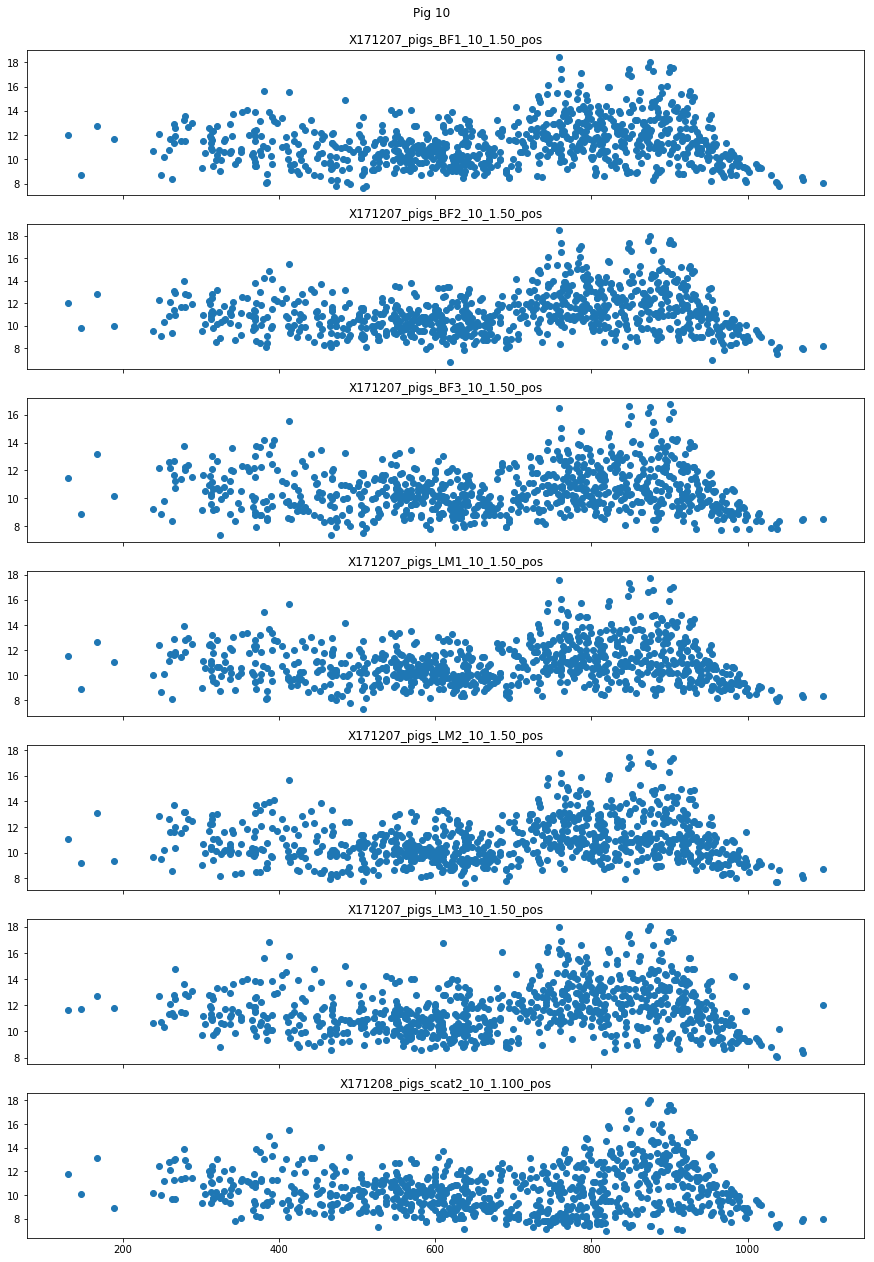

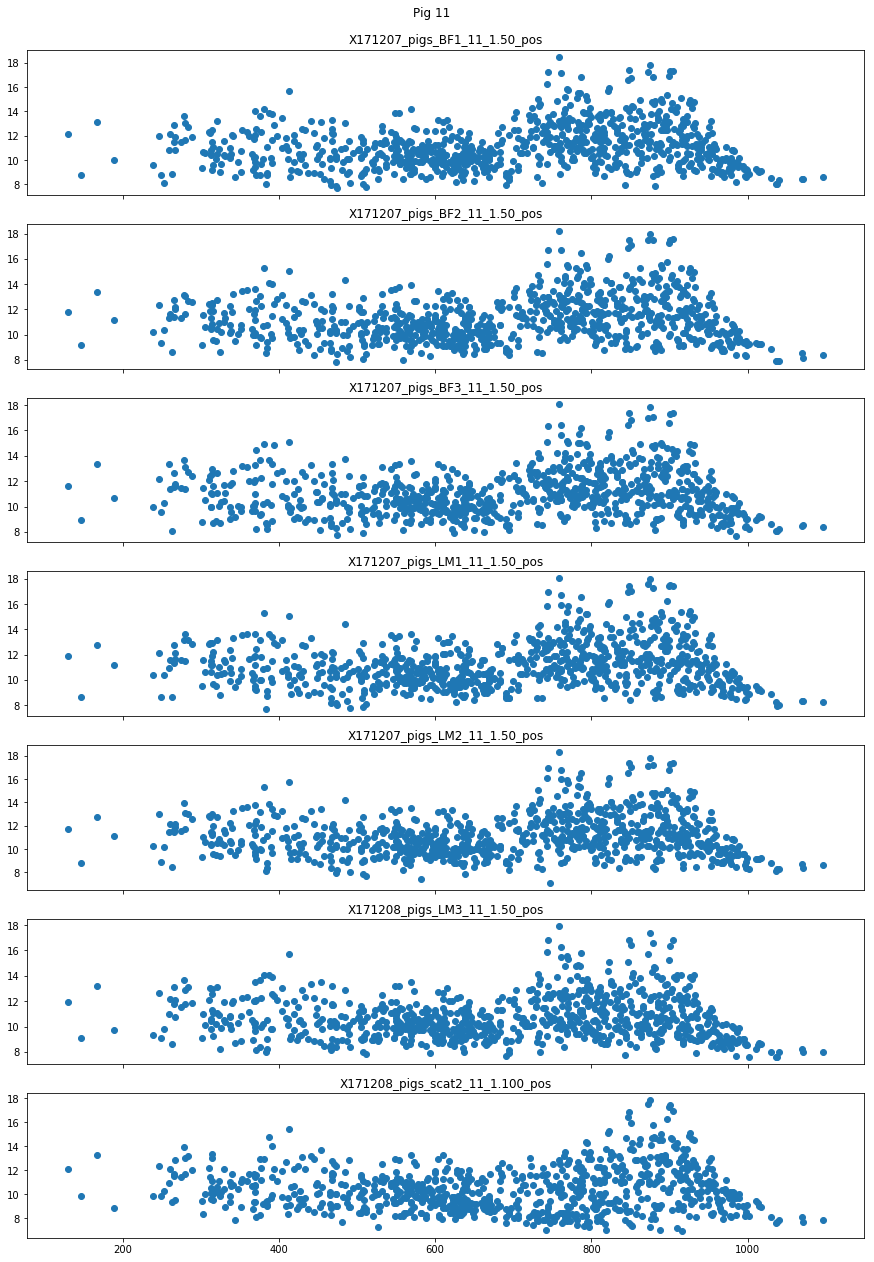

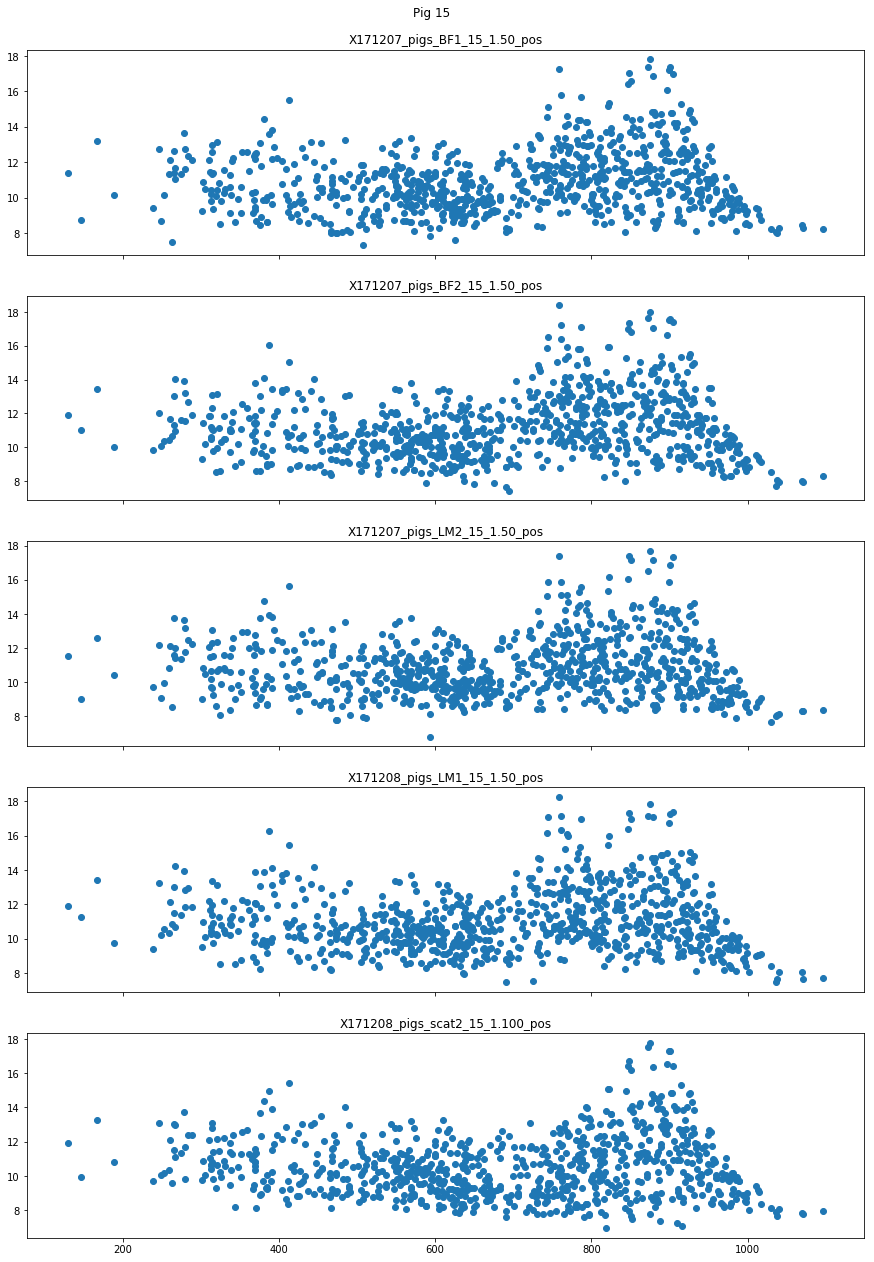

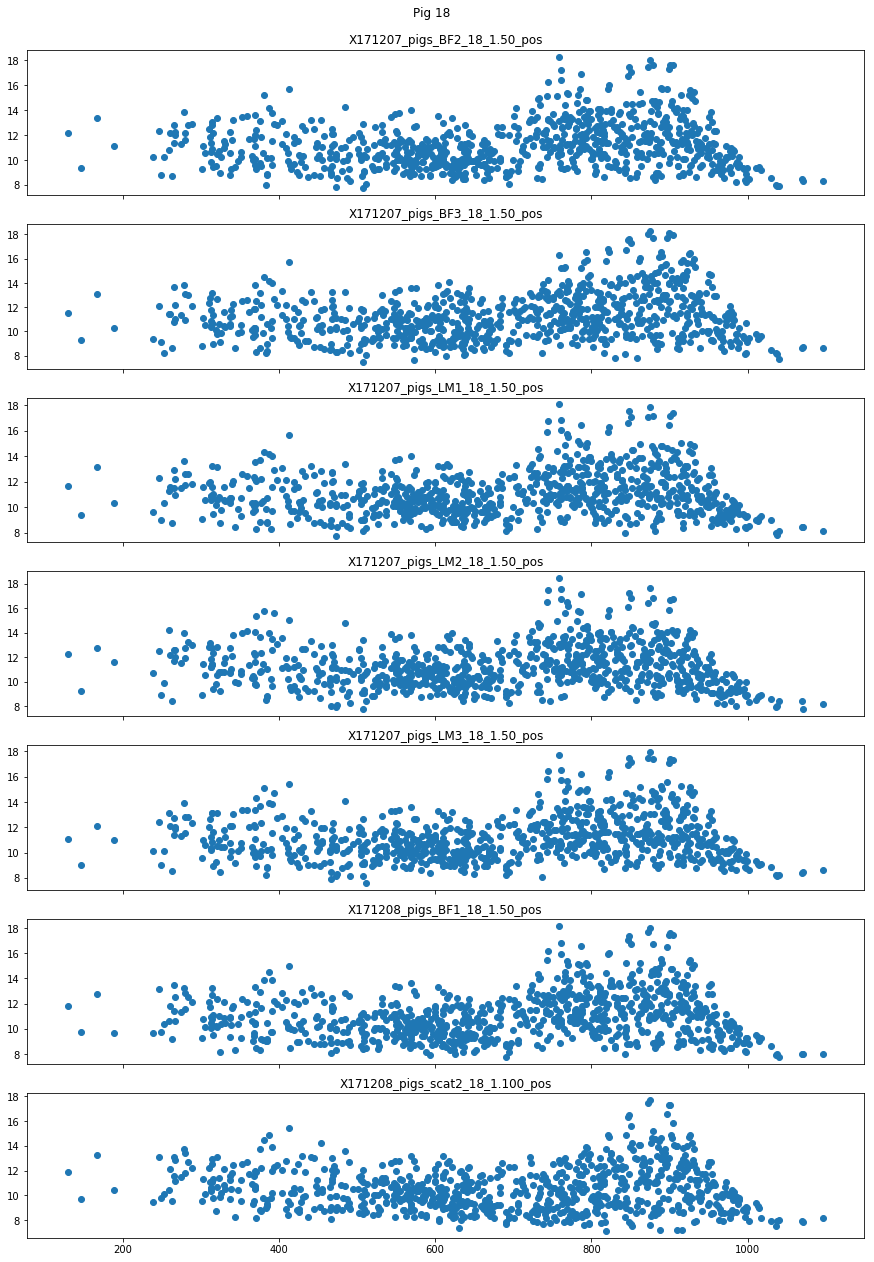

In [109]:
for pig, columns in sorted(pigs_mapping.items()):
    
    columns = sorted(columns)

    f, axarr = plt.subplots(len(columns), sharex=True, figsize=(15,20))
    
    for ax, col in zip(axarr, columns):
        ax.scatter(data_cam_filt_rt_iso_df_annot.mz, data_cam_filt_rt_iso_df_annot[col])
        ax.set_title(col)
    
    f.suptitle("Pig {0}".format(pig))
    f.subplots_adjust(top=0.95)
    
    plt.show()

In [110]:
parts_dfs = {part_name: data_cam_filt_rt_iso_df_annot[cols].T for part_name, cols in parts_mapping.items() }
parts_dfs = list(parts_dfs.items())

In [111]:
from rpy2.robjects import r, pandas2ri

pandas2ri.activate()
from rpy2.robjects.packages import importr

Hotelling = importr('Hotelling')

def hotelling_test(df1, df2):
    df1_r = pandas2ri.py2ri(df1)
    df2_r = pandas2ri.py2ri(df2)
    return Hotelling.hotelling_test(df1_r, df2_r)
    

In [112]:
Hotelling.hotelling_test()

/home/anna/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Error in nrow(x) : argument "x" is missing, with no default

  warnings.warn(x, RRuntimeWarning)


RRuntimeError: Error in nrow(x) : argument "x" is missing, with no default


In [113]:
for i in range(len(parts_dfs)):
    for j in range(i+1, len(parts_dfs)):
        part1, df1 = parts_dfs[i]
        part2, df2 = parts_dfs[j]
        
        test_result = hotelling_test(df1, df2)
        print(test_result)
        break
    break

/home/anna/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Error in hotelling.stat(x, y, shrinkage) : 
  The sample sizes (nx + ny) must be 1 greater than the number of columns

  warnings.warn(x, RRuntimeWarning)


RRuntimeError: Error in hotelling.stat(x, y, shrinkage) : 
  The sample sizes (nx + ny) must be 1 greater than the number of columns


In [114]:
samples = data_cam_filt_rt_iso_df_annot[[col for col in data_cam_filt_rt_iso_df_annot.columns if col.startswith("X") and "QC" not in col]]

In [115]:
samples.columns

Index(['X171206_pigs_scat1_3_15_pos_1.100', 'X171207_pigs_BF1_10_1.50_pos',
       'X171207_pigs_BF1_11_1.50_pos', 'X171207_pigs_BF1_15_1.50_pos',
       'X171207_pigs_BF1_2_1.50_pos', 'X171207_pigs_BF1_3_1.50_pos',
       'X171207_pigs_BF1_6_1.50_pos', 'X171207_pigs_BF1_9_1.50_pos',
       'X171207_pigs_BF2_10_1.50_pos', 'X171207_pigs_BF2_11_1.50_pos',
       'X171207_pigs_BF2_15_1.50_pos', 'X171207_pigs_BF2_18_1.50_pos',
       'X171207_pigs_BF2_2_1.50_pos', 'X171207_pigs_BF2_3_1.50_pos',
       'X171207_pigs_BF2_6_1.50_pos', 'X171207_pigs_BF2_8_1.50_pos',
       'X171207_pigs_BF2_9_1.50_pos', 'X171207_pigs_BF3_10_1.50_pos',
       'X171207_pigs_BF3_11_1.50_pos', 'X171207_pigs_BF3_18_1.50_pos',
       'X171207_pigs_BF3_2_1.50_pos', 'X171207_pigs_BF3_3_1.50_pos',
       'X171207_pigs_BF3_6_1.50_pos', 'X171207_pigs_BF3_8_1.50_pos',
       'X171207_pigs_BF3_9_1.50_pos', 'X171207_pigs_LM1_10_1.50_pos',
       'X171207_pigs_LM1_11_1.50_pos', 'X171207_pigs_LM1_18_1.50_pos',
       'X171207

In [116]:
del samples['X171206_pigs_scat1_3_15_pos_1.100']
del samples['X171208_pigs_scat1_2_15_1.100_pos']
del samples['X171208_pigs_scat1_1_15_1.100_pos']

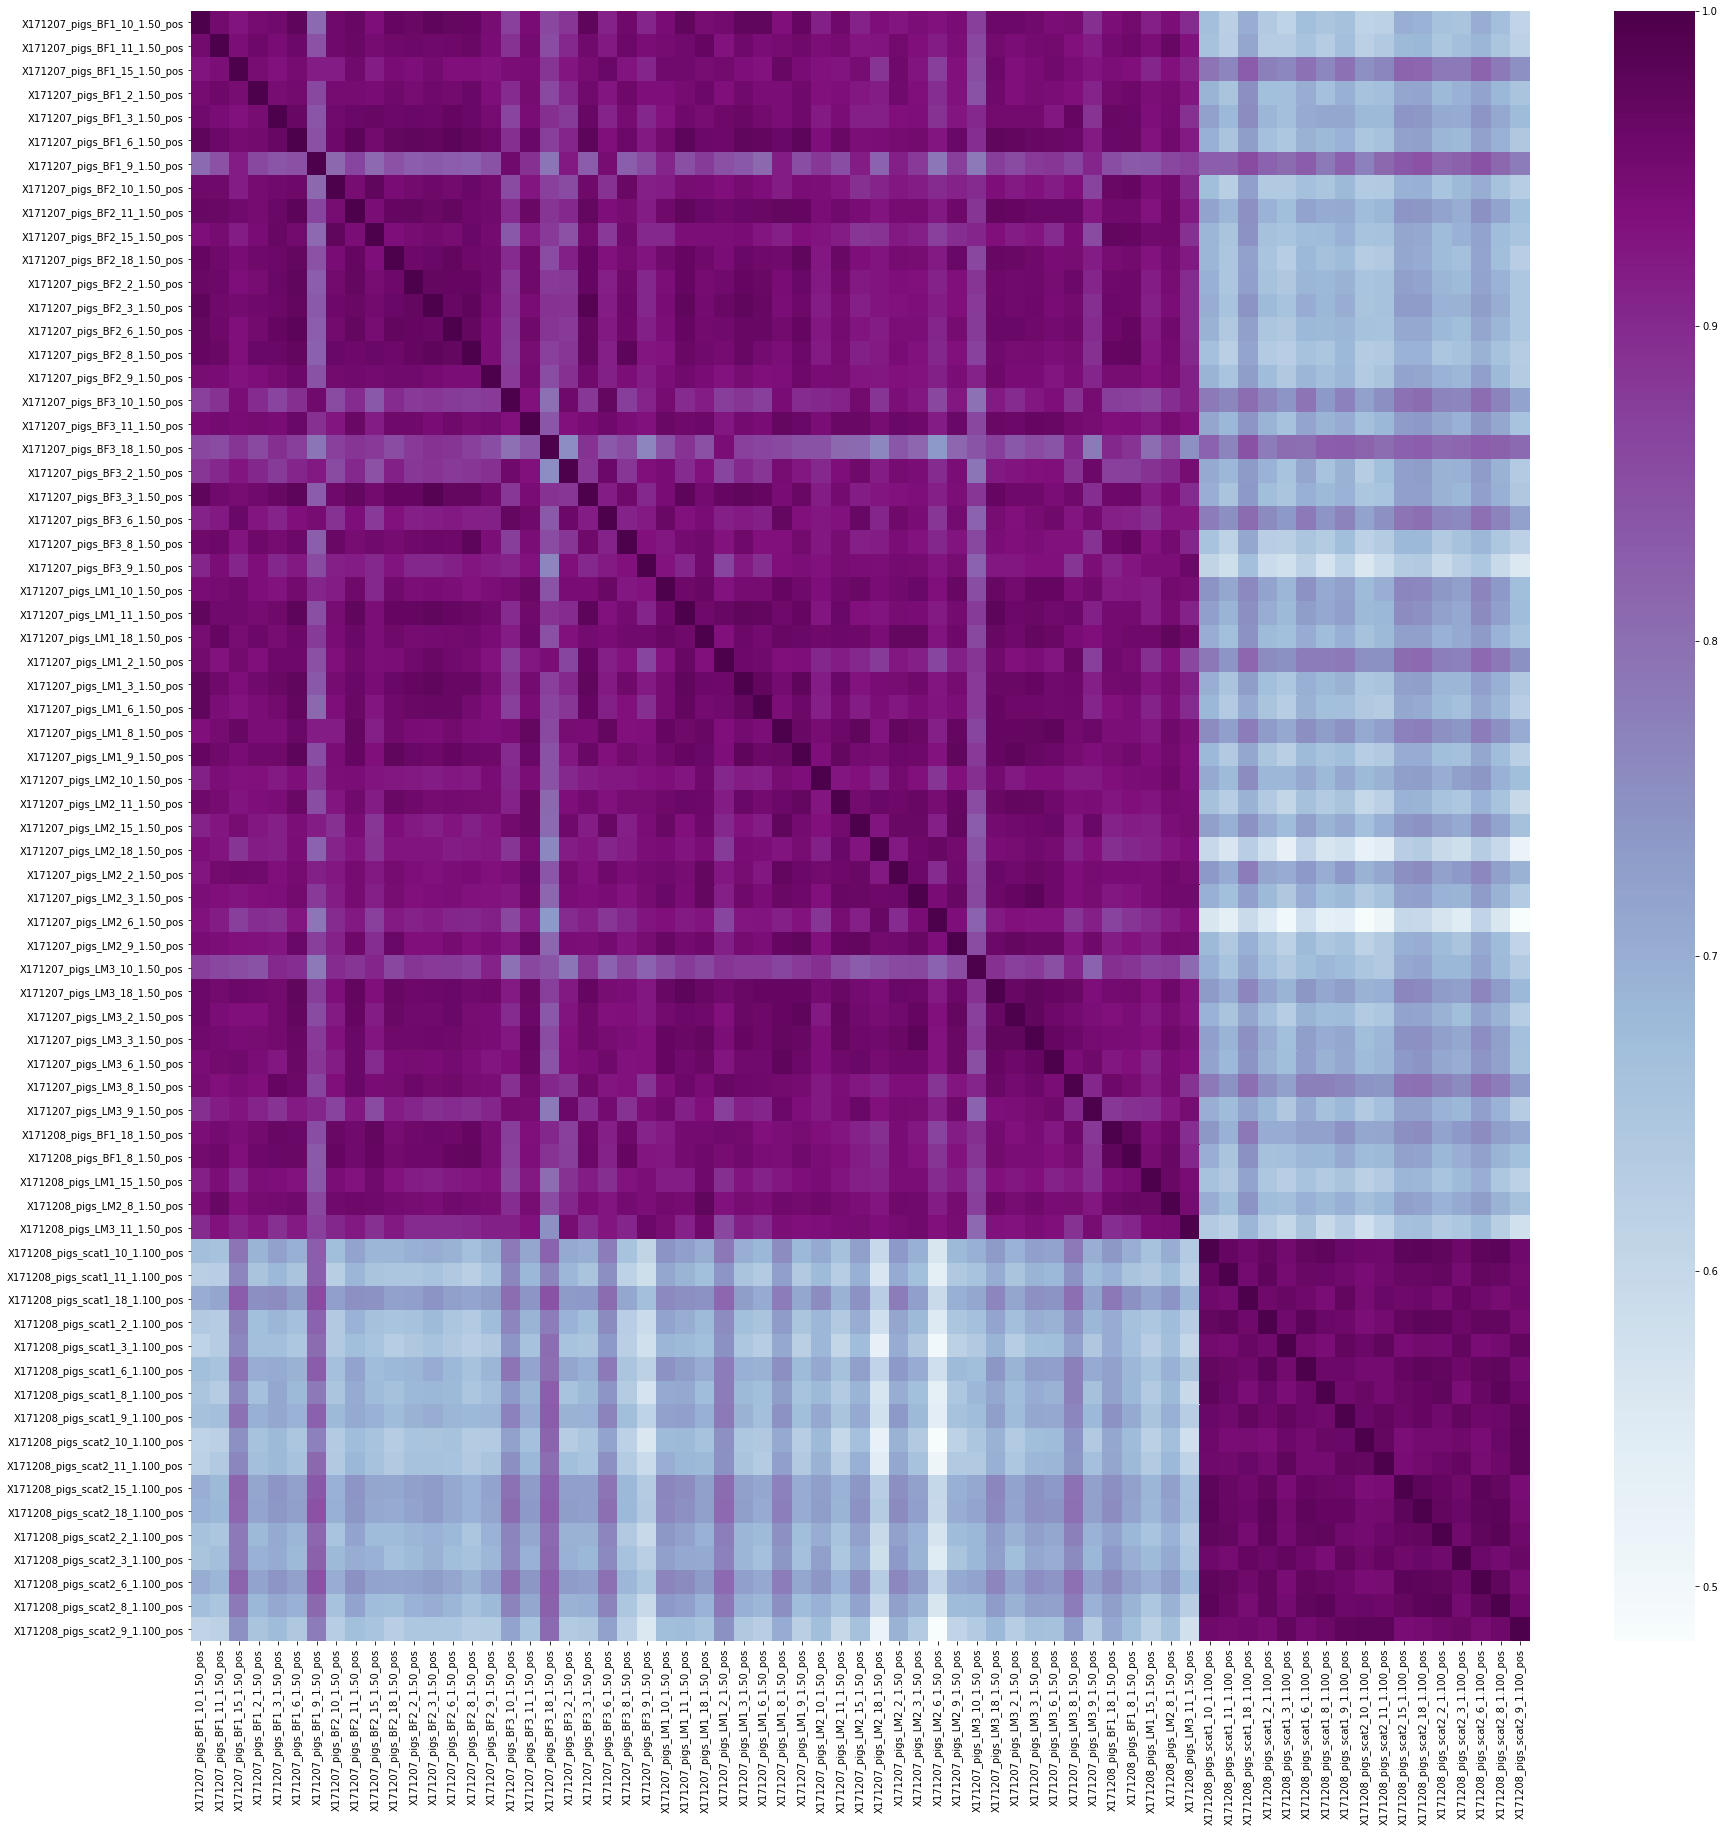

In [130]:
import seaborn

plt.gcf().set_size_inches(30, 30)

seaborn.heatmap(samples.corr(), cmap="BuPu")

In [118]:
samples.corr()

X171207_pigs_BF1_10_1.50_pos  \
X171207_pigs_BF1_10_1.50_pos                         1.000000   
X171207_pigs_BF1_11_1.50_pos                         0.952676   
X171207_pigs_BF1_15_1.50_pos                         0.929048   
X171207_pigs_BF1_2_1.50_pos                          0.947895   
X171207_pigs_BF1_3_1.50_pos                          0.954618   
X171207_pigs_BF1_6_1.50_pos                          0.977060   
X171207_pigs_BF1_9_1.50_pos                          0.807723   
X171207_pigs_BF2_10_1.50_pos                         0.957207   
X171207_pigs_BF2_11_1.50_pos                         0.967452   
X171207_pigs_BF2_15_1.50_pos                         0.938266   
X171207_pigs_BF2_18_1.50_pos                         0.968915   
X171207_pigs_BF2_2_1.50_pos                          0.964296   
X171207_pigs_BF2_3_1.50_pos                          0.976915   
X171207_pigs_BF2_6_1.50_pos                          0.970011   
X171207_pigs_BF2_8_1.50_pos                          0.969562   
X171207_pigs_BF2_9_1.50_pos                          0.946071   
X171207_pigs_BF3_10_1.50_pos                         0.872141   
X171207_pigs_BF3_11_1.50_pos                         0.943879   
X171207_pigs_BF3_18_1.50_pos                         0.862222   
X171207_pigs_BF3_2_1.50_pos                          0.883268   
X171207_pigs_BF3_3_1.50_pos                          0.977000   
X171207_pigs_BF3_6_1.50_pos                          0.909264   
X171207_pigs_BF3_8_1.50_pos                          0.956262   
X171207_pigs_BF3_9_1.50_pos                          0.905846   
X171207_pigs_LM1_10_1.50_pos                         0.943479   
X171207_pigs_LM1_11_1.50_pos                         0.975456   
X171207_pigs_LM1_18_1.50_pos                         0.947135   
X171207_pigs_LM1_2_1.50_pos                          0.952040   
X171207_pigs_LM1_3_1.50_pos                          0.974152   
X171207_pigs_LM1_6_1.50_pos                          0.973966   
...                                                       ...   
X171207_pigs_LM2_9_1.50_pos                          0.945094   
X171207_pigs_LM3_10_1.50_pos                         0.874401   
X171207_pigs_LM3_18_1.50_pos                         0.960002   
X171207_pigs_LM3_2_1.50_pos                          0.961018   
X171207_pigs_LM3_3_1.50_pos                          0.955502   
X171207_pigs_LM3_6_1.50_pos                          0.941945   
X171207_pigs_LM3_8_1.50_pos                          0.945677   
X171207_pigs_LM3_9_1.50_pos                          0.894431   
X171208_pigs_BF1_18_1.50_pos                         0.940337   
X171208_pigs_BF1_8_1.50_pos                          0.951560   
X171208_pigs_LM1_15_1.50_pos                         0.914043   
X171208_pigs_LM2_8_1.50_pos                          0.939421   
X171208_pigs_LM3_11_1.50_pos                         0.899186   
X171208_pigs_scat1_10_1.100_pos                      0.667958   
X171208_pigs_scat1_11_1.100_pos                      0.622718   
X171208_pigs_scat1_18_1.100_pos                      0.702152   
X171208_pigs_scat1_2_1.100_pos                       0.639808   
X171208_pigs_scat1_3_1.100_pos                       0.612060   
X171208_pigs_scat1_6_1.100_pos                       0.670116   
X171208_pigs_scat1_8_1.100_pos                       0.650631   
X171208_pigs_scat1_9_1.100_pos                       0.663466   
X171208_pigs_scat2_10_1.100_pos                      0.613097   
X171208_pigs_scat2_11_1.100_pos                      0.616398   
X171208_pigs_scat2_15_1.100_pos                      0.699769   
X171208_pigs_scat2_18_1.100_pos                      0.693704   
X171208_pigs_scat2_2_1.100_pos                       0.661164   
X171208_pigs_scat2_3_1.100_pos                       0.653195   
X171208_pigs_scat2_6_1.100_pos                       0.702394   
X171208_pigs_scat2_8_1.100_pos                       0.666744   
X171208_pigs_scat2_9_1.100_pos                       0.609580   

  

In [119]:
def pigs_vectors(variables, dependents):
    X = []
    Y = []
    
    
    for pig, cols in pigs_mapping.items():
        if pig == 15:
            continue
        
        x = []
        y = []
        
        for var_name in variables:
            for col in cols:
                if var_name in col:
                    x.append(data_cam_filt_rt_iso_df_annot[col])
                             
        for dep_name in dependents:
            for col in cols:
                if dep_name in col:
                    y.append(data_cam_filt_rt_iso_df_annot[col])
                    
        
        X.append(np.concatenate(x))
        Y.append(np.concatenate(y))
        
    return np.array(X), np.array(Y)

In [120]:
X, Y = pigs_vectors(["BF1", "BF2", "BF3", "LM1", "LM2", "LM3"], ["scat2"])

In [121]:
X.shape

(8, 5064)

In [122]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import LeaveOneOut

MSE 0.3015264333521279


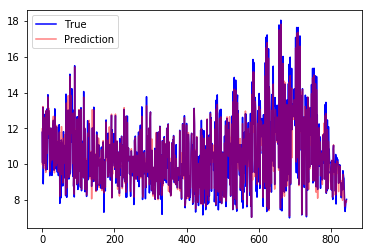

MSE 0.22965618657839235


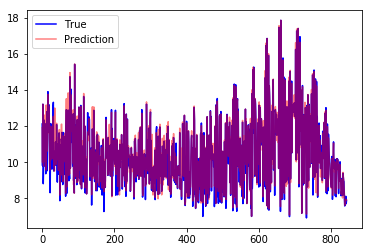

MSE 0.21672220819993834


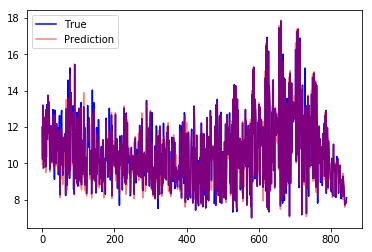

MSE 0.2618086262098686


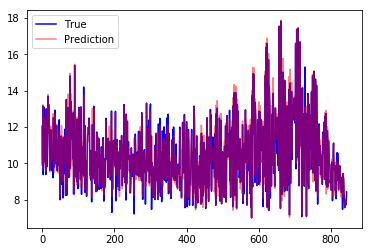

MSE 0.24181026846957154


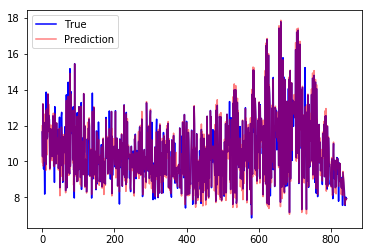

MSE 0.27319800363207486


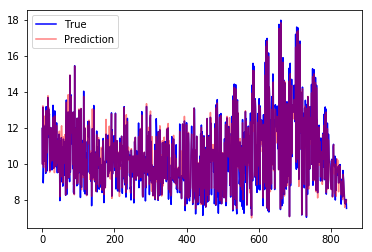

MSE 0.2468612927181379


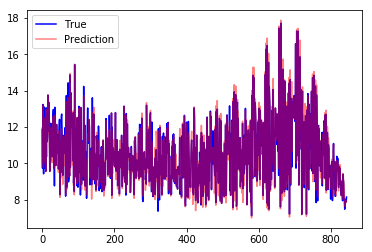

MSE 0.20550821279283482


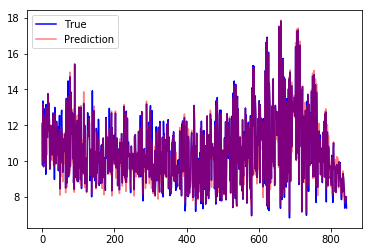

In [123]:
loo = LeaveOneOut()
pigs_mse = []

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    linreg = Ridge(alpha=1e6)
    linreg.fit(X_train, Y_train)
    square_errors =np.abs(Y_test - linreg.predict(X_test))
    mse = np.mean(square_errors)
    pigs_mse.append(mse)
    print("MSE", mse)
    plt.plot(Y_test.ravel(), label='True', c='b')
    plt.plot(linreg.predict(X_test).ravel(), label='Prediction', alpha=0.5, c='r')
    plt.legend()
    plt.show()

    

In [124]:
print("Average MSE", np.mean(pigs_mse))
print("Std MSE", np.std(pigs_mse))

Average MSE 0.2471364039941183
Std MSE 0.029250400401620642


In [125]:
parts_mse = []

for part1, part2 in zip(*pigs_vectors(["BF1"], ["BF2"])):
    square_errors =np.abs(part1.ravel() - part2.ravel())
    mse = np.mean(square_errors)
    parts_mse.append(mse)
    
print("MSE", np.mean(parts_mse))

MSE 0.4090785531590788


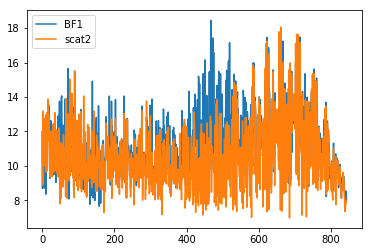

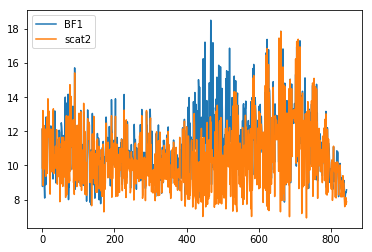

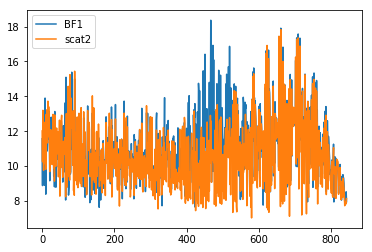

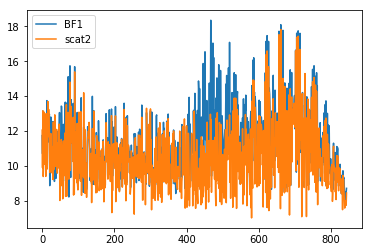

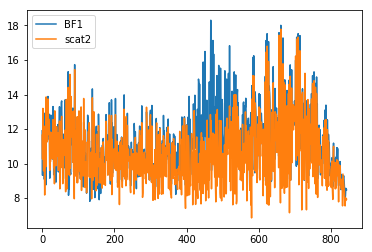

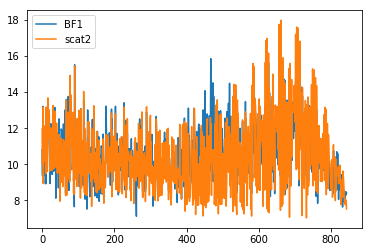

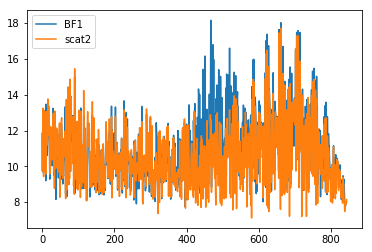

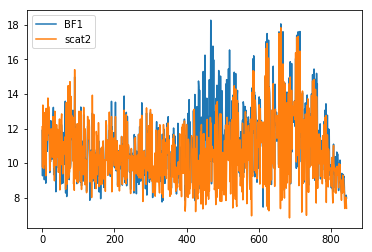

In [126]:
for bf, scat in zip(*pigs_vectors(["BF1"], ["scat2"])):
    plt.plot(bf.ravel(), label='BF1')
    plt.plot(scat.ravel(), label='scat2')
    plt.legend()
    plt.show()

In [127]:
data_cam_filt_rt_iso_df_annot.iloc[0]['lm_id']

'LMFA11000592;LMFA11000636;LMFA11000637;LMFA11000638;LMFA11000659'

## scat1

In [128]:
X, Y = pigs_vectors(["BF1", "BF2", "BF3", "LM1", "LM2", "LM3"], ["scat1"])

ValueError: need at least one array to concatenate

## MDS

In [129]:
print(__doc__)
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

Automatically created module for IPython interactive environment


In [ ]:
data_cam_filt_rt_iso_df_annot.drop(["X171208_pigs_scat1_1_15_1.100_pos", "X171208_pigs_scat1_2_15_1.100_pos"], axis = 1, inplace = True)
data_cam_filt_rt_iso_df_annot.rename(columns={"X171208_pigs_LM3_1_11_1.50_pos": "X171208_pigs_LM3_11_1.50_pos",
                                             "X171206_pigs_scat1_3_15_pos_1.100": "X171208_pigs_scat1_15_1.100_pos"}, inplace=True)

In [ ]:
all_columns = data_cam_filt_rt_iso_df_annot.columns.tolist()
samples_columns = all_columns[all_columns.index('X171208_pigs_scat1_15_1.100_pos')
                              :all_columns.index('X171208_pigs_scat2_9_1.100_pos')+1]

In [ ]:
import numpy as np
import pandas as pd
from sklearn import manifold
from sklearn.metrics import euclidean_distances

seed = np.random.RandomState(seed=3)
data = pd.read_csv('data/big-file.csv')

#  start small dont take all the data, 
#  its about 200k records
subset = data[:10000]
similarities = euclidean_distances(subset)

mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, 
      random_state=seed, dissimilarity="precomputed", n_jobs=1)

pos = mds.fit(similarities).embedding_